In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/job_descriptions.csv')

The dataset comprises 1,615,939 observations and 23 variables, focused on job descriptions. The objective is to develop a predictive model to estimate salary based on the provided data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [ ]:
df.shape

(1615940, 23)

In [ ]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,0
Company Size,0


In the provided code, a descriptive analysis is conducted on the dataset. Given that several variables are of the object data type, this has led to a substantial number of NaN values within the dataset.

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05


Checking for near zero variance

In [ ]:
# Select object data type columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Initialize a dictionary to store variance information
near_zero_variance_info = {}

In [ ]:
# Function to calculate near-zero variance
def calculate_near_zero_variance(column):
    freq = df[column].value_counts(normalize=True)
    most_common_freq = freq.max()
    return most_common_freq

In [ ]:
# Apply the function to each object column and store the results
for col in object_columns:
    most_common_freq = calculate_near_zero_variance(col)
    if most_common_freq > 0.95:  # Adjust the threshold as needed
        near_zero_variance_info[col] = most_common_freq

In [ ]:
# Display the near-zero variance information
print("Variables with near-zero variance:")
for var, freq in near_zero_variance_info.items():
    print(f"{var}: Proportion of most frequent category = {freq:.2f}")

Variables with near-zero variance:


It means that none of the categorical variables in dataset have a near-zero variance based on the criterion we used (i.e., no single category constitutes more than 95% of the values in any column). This implies that all categorical variables have a diverse distribution of values.

> Add blockquote

> Add blockquote





I will proceed by extracting the Sector and Industry information from the Company Profile variable. This is because I plan to drop the Company Profile variable from the dataset. The Sector and Industry details are crucial for predicting salaries, while the remaining information, such as the address, is not deemed necessary for the salary prediction model.

In [ ]:
df['Company Profile'].nunique()

884

In [ ]:
pip install pandas openpyxl

In [ ]:
import json

In [ ]:
# Function to extract Sector and Industry from JSON string
def extract_sector_and_industry(json_str):
    # Handle potential non-string values
    if isinstance(json_str, (str, bytes, bytearray)):
        # Attempt to clean the JSON string by replacing problematic characters
        json_str = json_str.replace("'", '"')  # Replace single quotes with double quotes

        try:
            data = json.loads(json_str)
            return pd.Series([data.get("Sector"), data.get("Industry")])
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}, String: {json_str}")  # Print error and problematic string
            return pd.Series([None, None])
    else:
        return pd.Series([None, None]) # Return None for non-parsable values

# Apply the function to the 'Company Profile' column
df[['Sector', 'Industry']] = df['Company Profile'].apply(extract_sector_and_industry)

# Display the dataframe with the new columns
print(df[['Sector', 'Industry']])

Streaming output truncated to the last 5000 lines.
Error decoding JSON: Expecting ',' delimiter: line 1 column 174 (char 173), String: {"Sector":"Energy","Industry":"Mining, Crude-Oil Production","City":"Oklahoma City","State":"Oklahoma","Zip":"73118","Website":"www.chk.com","Ticker":"CHK","CEO":"Nick Dell"Osso"}
Error decoding JSON: Expecting ',' delimiter: line 1 column 167 (char 166), String: {"Sector":"Beverages","Industry":"Beverages","City":"Bengaluru","State":"Karnataka","Zip":"560 001","Website":"www.unitedbreweries.com","Ticker":"UBL","CEO":"Sunil D"Souza"}
Error decoding JSON: Expecting ',' delimiter: line 1 column 179 (char 178), String: {"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ticker":"PWR","CEO":"Earl C. "Duke" Austin"}
Error decoding JSON: Expecting ',' delimiter: line 1 column 152 (char 151), String: {"Sector":"Utilities","Industry":"Utilities","City":"Windsor, UK",

In [ ]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Sector,Industry
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",Diversified,Diversified Financials
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",Financial Services,Commercial Banks
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",Insurance,Insurance: Property and Casualty (Stock)
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",Energy,"Mining, Crude-Oil Production"
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",Energy,Energy - Oil & Gas Exploration & Production


I will now proceed to drop several columns from the dataset that do not contribute significantly to predicting salary:

Job ID: Serves as a unique identifier for each job posting, but does not provide relevant information for salary prediction.

Latitude: Contains geographic coordinates of the job location, which is not a key factor in determining salary.

Longitude: Also contains geographic coordinates of the job location, and does not influence salary prediction.

Company Size: Provides an estimate of the company's scale, which does not impact the salary of an employee.

Job Posting Date: Includes the date the job was posted, which does not directly affect salary. If hiring dates were available, they might have been relevant.
Contact Person: Contains information about the recruiter, which is not relevant to salary prediction.

Contact: Provides contact details of the recruiter, which does not impact salary.

Job Portal: Indicates the platform where the job was posted, which does not influence salary.

Job Description and Responsibilities: Although this information could affect salary, it is redundant with the Role variable, which encompasses similar details.

Benefits: Lists benefits provided by the company, which does not impact the salary.

Company Profile: Extracted relevant information into separate variables, making the original column redundant.


In [ ]:
df.drop(columns=['Job Id','latitude','longitude','Company Size','Job Posting Date','Contact Person','Contact',
                 'Job Portal','Job Description','Responsibilities','Company Profile'],
        inplace=True)

In [ ]:
df.head()

,Experience,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Digital Marketing Specialist,Social Media Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Web Developer,Frontend Web Developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Operations Manager,Quality Control Manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock)
3,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Network Engineer,Wireless Network Engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production"
4,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Event Manager,Conference Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Experience      1615940 non-null  object
 1   Qualifications  1615940 non-null  object
 2   Salary Range    1615940 non-null  object
 3   location        1615940 non-null  object
 4   Country         1615940 non-null  object
 5   Work Type       1615940 non-null  object
 6   Preference      1615940 non-null  object
 7   Job Title       1615940 non-null  object
 8   Role            1615940 non-null  object
 9   Benefits        1615940 non-null  object
 10  skills          1615940 non-null  object
 11  Company         1615940 non-null  object
 12  Sector          1586700 non-null  object
 13  Industry        1586700 non-null  object
dtypes: object(14)
memory usage: 172.6+ MB


In [ ]:
df.shape

(1615940, 13)

In [ ]:
df.isnull().sum()

Experience            0
Qualifications        0
Salary Range          0
location              0
Country               0
Work Type             0
Preference            0
Job Title             0
Role                  0
skills                0
Company               0
Sector            29240
Industry          29240
dtype: int64

In [ ]:
df.duplicated().sum()

0

Next, I will decompose the Experience column into two separate variables: Experience Min and Experience Max. This division will enable more granular analysis by clearly defining the minimum and maximum experience levels required for each job posting, which can enhance the accuracy of our salary prediction model.

In [ ]:
df['Experience'].nunique()

48

In [ ]:
df[['Experience min', 'Experience max']] = df['Experience'].str.split(' to ', expand=True)

# Convert string to integers
df['Experience min'] = df['Experience min'].str.replace(' Years', '').astype(int)
df['Experience max'] = df['Experience max'].str.replace(' Years', '').astype(int)
df.head()

,Experience,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Digital Marketing Specialist,Social Media Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Web Developer,Frontend Web Developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Operations Manager,Quality Control Manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12
3,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Network Engineer,Wireless Network Engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11
4,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Event Manager,Conference Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12


In [ ]:
df.drop(columns=['Experience'], inplace=True)

In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,skills,Company,Sector,Industry,Experience min,Experience max
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Digital Marketing Specialist,Social Media Manager,"Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Web Developer,Frontend Web Developer,"HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Operations Manager,Quality Control Manager,Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Network Engineer,Wireless Network Engineer,Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Event Manager,Conference Manager,Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12


In [ ]:
df['Job Title'].unique()

array(['Digital Marketing Specialist', 'Web Developer',
       'Operations Manager', 'Network Engineer', 'Event Manager',
       'Software Tester', 'Teacher', 'UX/UI Designer', 'Wedding Planner',
       'QA Analyst', 'Litigation Attorney', 'Mechanical Engineer',
       'Network Administrator', 'Account Manager', 'Brand Manager',
       'Social Worker', 'Social Media Coordinator',
       'Email Marketing Specialist', 'HR Generalist', 'Legal Assistant',
       'Nurse Practitioner', 'Account Director', 'Software Engineer',
       'Purchasing Agent', 'Sales Consultant', 'Civil Engineer',
       'Network Security Specialist', 'UI Developer', 'Financial Planner',
       'Event Planner', 'Psychologist', 'Electrical Designer',
       'Data Analyst', 'Technical Writer', 'Tax Consultant',
       'Account Executive', 'Systems Administrator',
       'Database Administrator', 'Research Analyst', 'Data Entry Clerk',
       'Registered Nurse', 'Investment Analyst', 'Speech Therapist',
       'Sales M

In [ ]:
df['Job Title'].nunique()

147

In [ ]:
operations_manager_salaries = df[df['Job Title'].str.contains('Operations Manager', case=False, na=False)]['Salary Range'].unique()
print(operations_manager_salaries)

['$61K-$104K' '$64K-$130K' '$65K-$101K' '$60K-$104K' '$62K-$81K'
 '$59K-$92K' '$57K-$126K' '$57K-$86K' '$65K-$117K' '$59K-$91K'
 '$56K-$129K' '$64K-$111K' '$63K-$121K' '$63K-$92K' '$60K-$122K'
 '$55K-$102K' '$59K-$100K' '$58K-$111K' '$61K-$129K' '$60K-$94K'
 '$57K-$127K' '$63K-$100K' '$65K-$88K' '$59K-$98K' '$57K-$110K'
 '$55K-$116K' '$60K-$96K' '$65K-$97K' '$56K-$128K' '$62K-$100K'
 '$64K-$82K' '$61K-$109K' '$58K-$119K' '$61K-$85K' '$55K-$82K'
 '$55K-$120K' '$64K-$117K' '$57K-$90K' '$64K-$85K' '$65K-$85K' '$63K-$81K'
 '$57K-$100K' '$65K-$94K' '$58K-$103K' '$65K-$122K' '$57K-$115K'
 '$61K-$90K' '$62K-$85K' '$58K-$96K' '$59K-$105K' '$62K-$124K' '$58K-$84K'
 '$57K-$89K' '$55K-$90K' '$63K-$95K' '$60K-$102K' '$64K-$129K' '$65K-$83K'
 '$63K-$119K' '$58K-$99K' '$56K-$111K' '$57K-$123K' '$57K-$97K'
 '$60K-$89K' '$63K-$88K' '$55K-$124K' '$61K-$128K' '$61K-$88K'
 '$63K-$111K' '$64K-$86K' '$56K-$94K' '$55K-$123K' '$59K-$83K'
 '$65K-$121K' '$61K-$112K' '$63K-$113K' '$63K-$96K' '$63K-$106K'
 '$56K

In [ ]:
event_manager_salaries = df[df['Job Title'].str.contains('Event Manager', case=False, na=False)]['Salary Range'].unique()
print(event_manager_salaries)

['$64K-$87K' '$57K-$90K' '$55K-$101K' '$65K-$117K' '$63K-$89K'
 '$56K-$124K' '$57K-$86K' '$57K-$129K' '$58K-$113K' '$61K-$114K'
 '$64K-$99K' '$55K-$83K' '$63K-$88K' '$63K-$119K' '$59K-$105K'
 '$61K-$126K' '$62K-$101K' '$58K-$123K' '$58K-$119K' '$64K-$101K'
 '$60K-$93K' '$64K-$98K' '$62K-$102K' '$63K-$86K' '$65K-$93K' '$60K-$108K'
 '$58K-$106K' '$63K-$125K' '$55K-$107K' '$63K-$128K' '$65K-$120K'
 '$63K-$108K' '$55K-$94K' '$61K-$96K' '$61K-$112K' '$61K-$127K'
 '$60K-$96K' '$55K-$91K' '$58K-$80K' '$63K-$85K' '$55K-$124K' '$64K-$120K'
 '$61K-$95K' '$64K-$121K' '$55K-$87K' '$63K-$117K' '$61K-$109K'
 '$61K-$120K' '$55K-$89K' '$60K-$101K' '$60K-$111K' '$62K-$100K'
 '$57K-$114K' '$55K-$81K' '$64K-$80K' '$58K-$86K' '$61K-$81K' '$63K-$104K'
 '$57K-$103K' '$60K-$102K' '$58K-$92K' '$59K-$118K' '$65K-$111K'
 '$58K-$101K' '$65K-$95K' '$58K-$125K' '$65K-$88K' '$58K-$100K'
 '$58K-$94K' '$60K-$107K' '$59K-$92K' '$58K-$124K' '$62K-$85K' '$56K-$99K'
 '$57K-$124K' '$61K-$121K' '$64K-$114K' '$55K-$100K' '$

In [ ]:
df['Specific Job title'] = df['Job Title']

In [ ]:
# Define a dictionary of keywords to standardized job titles
job_title_mapping = {
    'manager': 'Manager',
    'developer': 'Developer',
    'engineer': 'Engineer',
    'analyst': 'Analyst',
    'consultant': 'Consultant',
    'administrator': 'Administrator',
    'specialist': 'Specialist',
    'assistant': 'Assistant',
    'coordinator': 'Coordinator',
    'director': 'Director',
    'executive': 'Executive',
    'technician': 'Technician',
    'architect': 'Architect',
    'lead': 'Lead',
    'head': 'Head',
    'supervisor': 'Supervisor',
    'generalist': 'Generalist',
    'writer': 'Writer',
    'nurse': 'Nurse',
    'secretary': 'Secretary',
    'accountant': 'Accountant',
    'banker': 'Banker',
    'counselor': 'Counselor',
    'attorney': 'Attorney',
    'clerk': 'Clerk',
    'teacher':'Teacher',
    'lawyer': 'Lawyer',
    'representative': 'Representative',
    'scientist': 'Scientist',
    'advisor': 'Advisor',
    'programmer': 'Programmer',
    'designer': 'Designer',
    'therapist': 'Therapist',
    'ambassador': 'Ambassador'

}

# Display the mapping
job_title_mapping

{'manager': 'Manager',
 'developer': 'Developer',
 'engineer': 'Engineer',
 'analyst': 'Analyst',
 'consultant': 'Consultant',
 'administrator': 'Administrator',
 'specialist': 'Specialist',
 'assistant': 'Assistant',
 'coordinator': 'Coordinator',
 'director': 'Director',
 'executive': 'Executive',
 'technician': 'Technician',
 'architect': 'Architect',
 'lead': 'Lead',
 'head': 'Head',
 'supervisor': 'Supervisor',
 'generalist': 'Generalist',
 'writer': 'Writer',
 'nurse': 'Nurse',
 'secretary': 'Secretary',
 'accountant': 'Accountant',
 'banker': 'Banker',
 'counselor': 'Counselor',
 'attorney': 'Attorney',
 'clerk': 'Clerk',
 'teacher': 'Teacher',
 'lawyer': 'Lawyer',
 'representative': 'Representative',
 'scientist': 'Scientist',
 'advisor': 'Advisor',
 'programmer': 'Programmer',
 'designer': 'Designer',
 'therapist': 'Therapist',
 'ambassador': 'Ambassador'}

In [ ]:
# Function to clean job titles based on the mapping
def clean_job_title(title):
    title = title.lower()  # Convert to lowercase for case-insensitive matching
    for keyword, standardized_title in job_title_mapping.items():
        if keyword in title:
            return standardized_title
    return title.capitalize()  # Capitalize the first letter for titles not in the mapping

# Apply the function to the Job Title column
df['Job Title'] = df['Job Title'].apply(clean_job_title)

# Display the first few rows to verify the changes
df[['Job Title']].head(20)

,Job Title
0,Specialist
1,Developer
2,Manager
3,Engineer
4,Manager
5,Software tester
6,Teacher
7,Designer
8,Designer
9,Wedding planner


In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,Social Media Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,Frontend Web Developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,Quality Control Manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,Wireless Network Engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,Conference Manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager


In [ ]:
df['Job Title'].unique()

array(['Specialist', 'Developer', 'Manager', 'Engineer',
       'Software tester', 'Teacher', 'Designer', 'Wedding planner',
       'Analyst', 'Attorney', 'Administrator', 'Social worker',
       'Coordinator', 'Generalist', 'Assistant', 'Nurse', 'Director',
       'Purchasing agent', 'Consultant', 'Financial planner',
       'Event planner', 'Psychologist', 'Writer', 'Executive', 'Clerk',
       'Therapist', 'Architect', 'Ux researcher', 'Banker', 'Counselor',
       'Accountant', 'Representative', 'Legal counsel', 'Urban planner',
       'Lawyer', 'Technician', 'Veterinarian', 'Scientist',
       'Financial controller', 'Advisor', 'Paralegal', 'Dental hygienist',
       'Pediatrician', 'Ambassador', 'Sales associate', 'Secretary'],
      dtype=object)

In [ ]:
df['Job Title'].nunique()

46

In [ ]:
df['Job Title']

0             Specialist
1              Developer
2                Manager
3               Engineer
4                Manager
               ...      
1615935         Engineer
1615936          Manager
1615937         Engineer
1615938      Coordinator
1615939    Event planner
Name: Job Title, Length: 1615940, dtype: object

In [ ]:
df['Role'].unique()

array(['social media manager', 'frontend web developer',
       'quality control manager', 'wireless network engineer',
       'conference manager', 'quality assurance analyst',
       'classroom teacher', 'user interface designer',
       'interaction designer', 'wedding consultant',
       'performance testing specialist', 'family law attorney',
       'mechanical design engineer', 'network security analyst',
       'sales account manager', 'product brand manager',
       'school social worker', 'content creator',
       'deliverability analyst', 'hr coordinator', 'legal secretary',
       'family nurse practitioner', 'account strategist',
       'backend developer', 'supply chain coordinator',
       'b2b sales consultant', 'structural engineer',
       'security operations center (soc) analyst', 'front-end developer',
       'tax planner', 'event coordinator', 'clinical psychologist',
       'electrical engineer', 'lighting designer',
       'business intelligence analyst', 'conten

In [ ]:
df['Role'].nunique()

376

In [ ]:
df['Role'] = df['Role'].str.lower()  # Convert to lowercase

In [ ]:
# Define a function to categorize roles
def categorize_role(role):
    if 'manager' in role:
        return 'Manager'
    elif 'analyst' in role:
        return 'Analyst'
    elif 'developer' in role:
        return 'Developer'
    elif 'engineer' in role:
        return 'Engineer'
    elif 'consultant' in role:
        return 'Consultant'
    elif 'administrator' in role:
        return 'Administrator'
    elif 'specialist' in role:
        return 'Specialist'
    elif 'assistant' in role:
        return 'Assistant'
    elif 'coordinator' in role:
        return 'Coordinator'
    elif 'director' in role:
        return 'Director'
    elif 'executive' in role:
        return 'Executive'
    elif 'technician' in role:
        return 'Technician'
    elif 'architect' in role:
        return 'Architect'
    elif 'lead' in role:
        return 'lead'
    elif 'teacher' in role:
        return 'Teacher'
    elif 'supervisor' in role:
        return 'Supervisor'
    elif 'generalist' in role:
        return 'Generalist'
    elif 'writer' in role:
        return 'Writer'
    elif 'nurse' in role:
        return 'Nurse'
    elif 'secretary' in role:
        return 'Secretary'
    elif 'accountant' in role:
        return 'Accountant'
    elif 'banker' in role:
        return 'Banker'
    elif 'counselor' in role:
        return 'Counselor'
    elif 'attorney' in role:
        return 'Attorney'
    elif 'clerk' in role:
        return 'Clerk'
    elif 'lawyer' in role:
        return 'Lawyer'
    elif 'representative' in role:
        return 'Representative'
    elif 'scientist' in role:
        return 'Scientist'
    elif 'advisor' in role:
        return 'Advisor'
    elif 'programmer' in role:
        return 'Programmer'
    elif 'designer' in role:
        return 'Designer'
    elif 'therapist' in role:
        return 'Therapist'
    elif 'ambassador' in role:
        return 'Ambassador'
    elif 'sales' in role:
        return 'Sales'
    elif 'marketing' in role:
        return 'Marketing'
    elif 'customer' in role:
        return 'Customer Service'
    elif 'human' in role:
        return 'Human Resources'
    elif 'operations' in role:
        return 'Operations'
    elif 'project' in role:
        return 'Project Management'
    elif 'data' in role:
        return 'Data Analyst'
    elif 'software' in role:
        return 'Software Engineer'
    elif 'product' in role:
        return 'Product Manager'
    elif 'quality' in role:
        return 'Quality Assurance'
    elif 'strategy' in role:
        return 'Strategy'
    elif 'financial' in role:
        return 'Financial Analyst'
    elif 'legal' in role:
        return 'Legal'
    elif 'education' in role:
        return 'Education'
    elif 'research' in role:
        return 'Researcher'
    elif 'administration' in role:
        return 'Administration'
    elif 'sales' in role:
        return 'Sales'
    elif 'strategist' in role:
        return 'Strategist'
    elif 'planner' in role:
        return 'Planner'
    elif 'Content' in role:
        return 'Content creatoer'
    elif 'psychologist' in role:
        return 'Psychologist'
    elif 'tester' in role:
        return 'Tester'
    elif 'pathologist' in role:
        return 'Pathologist'
    elif 'agent' in role:
        return 'Agent'
    elif 'veterinarian' in role:
        return 'Veterinarian'
    elif 'ligitator' in role:
        return 'Ligitator'
    elif 'instrucrot' in role:
        return 'Instrucrot'
    elif 'counsel' in role:
      return 'Counselor'
    elif 'accounting' in role:
      return 'Accounting'
    elif 'care provider;' in role:
      return 'Care Provider'
    elif 'pediatrician' in role:
      return 'Pediatrician'
    elif 'chemist' in role:
      return 'Chemist'
    elif 'officer' in role:
      return 'Officer'
    elif 'influencer' in role:
      return 'Influencer'
    elif 'marketer' in role:
      return 'Marketer'
    elif 'hygenist' in role:
      return 'Hygenist'

    # Add more conditions as needed
    else:
        return role


In [ ]:
df['General Role'] = df['Role'].apply(categorize_role)


In [ ]:
df['Specialized Role'] = df['Role']

In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager


In [ ]:
df['General Role'].unique()

array(['Manager', 'Developer', 'Engineer', 'Analyst', 'Teacher',
       'Designer', 'Consultant', 'Specialist', 'Attorney',
       'school social worker', 'content creator', 'Coordinator',
       'Secretary', 'Nurse', 'Strategist', 'Planner', 'Psychologist',
       'Writer', 'Tester', 'Executive', 'Researcher', 'record keeper',
       'Pathologist', 'Director', 'Counselor', 'Technician',
       'art curator', 'Architect', 'Accountant', 'Representative', 'lead',
       'Therapist', 'Administrator', 'Agent', 'Lawyer', 'Scientist',
       'Veterinarian', 'Legal', 'Assistant', 'corporate litigator',
       'fine arts instructor', 'Advisor', 'Financial Analyst',
       'child welfare worker', 'dental hygiene educator',
       'pediatric surgeon', 'Accounting', 'primary care provider',
       'mediator', 'Pediatrician', 'Chemist', 'Officer', 'Influencer',
       'Product Manager', 'Customer Service', 'recovery coach', 'Sales',
       'Marketer', 'Software Engineer', 'dental public health hyg

In [ ]:
df['General Role'].nunique()

64

In [ ]:
general_role_counts = df['General Role'].value_counts()

In [ ]:
general_role_counts

,count
General Role,
Manager,225744
Analyst,173812
Specialist,135446
Designer,131687
Engineer,124873
Developer,80010
Coordinator,79627
Planner,55347
Administrator,41953


In [ ]:
df['General Role']

0              Manager
1            Developer
2              Manager
3             Engineer
4              Manager
              ...     
1615935       Engineer
1615936       Director
1615937       Engineer
1615938    Coordinator
1615939        Planner
Name: General Role, Length: 1615940, dtype: object

In [ ]:
df.head(10)

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,...,Specific Job title,General Role,Specialized Role,Numeric Salary,min,max,median,mean,std,General Salary Range
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",...,Digital Marketing Specialist,Manager,social media manager,None,NaN,NaN,NaN,NaN,NaN,-4917.516689258629 - 5082.483310741371
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",...,Web Developer,Developer,frontend web developer,None,NaN,NaN,NaN,NaN,NaN,-4917.550537432821 - 5082.449462567179
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,...,Operations Manager,Manager,quality control manager,None,NaN,NaN,NaN,NaN,NaN,-4917.516689258629 - 5082.483310741371
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,...,Network Engineer,Engineer,wireless network engineer,None,NaN,NaN,NaN,NaN,NaN,-4917.487979787464 - 5082.512020212536
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,...,Event Manager,Manager,conference manager,None,NaN,NaN,NaN,NaN,NaN,-4917.516689258629 - 5082.483310741371
5,MCA,$59K-$93K,Brussels,Belgium,Full-Time,Male,Software tester,quality assurance analyst,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,...,Software Tester,Analyst,quality assurance analyst,None,NaN,NaN,NaN,NaN,NaN,-4917.512453110257 - 5082.487546889743
6,PhD,$63K-$103K,George Town,Cayman Islands,Temporary,Both,Teacher,classroom teacher,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,...,Teacher,Teacher,classroom teacher,None,NaN,NaN,NaN,NaN,NaN,-4917.435734597157 - 5082.564265402843
7,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,Contract,Female,Designer,user interface designer,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,...,UX/UI Designer,Designer,user interface designer,None,NaN,NaN,NaN,NaN,NaN,-4917.5052814628625 - 5082.4947185371375
8,BBA,$65K-$102K,Male,Maldives,Temporary,Female,Designer,interaction designer,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,...,UX/UI Designer,Designer,interaction designer,None,NaN,NaN,NaN,NaN,NaN,-4917.5052814628625 - 5082.4947185371375
9,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,Full-Time,Both,Wedding planner,wedding consultant,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,...,Wedding Planner,Consultant,wedding consultant,None,NaN,NaN,NaN,NaN,NaN,-4917.570652564933 - 5082.429347435067


In [ ]:
df['skills'].unique()

array(['Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising',
       'HTML, CSS, JavaScript Frontend frameworks (e.g., React, Angular) User experience (UX)',
       'Quality control processes and methodologies Statistical process control (SPC) Root cause analysis and corrective action Quality management systems (e.g., ISO 9001) Compliance and regulatory knowledge',
       'Wireless network design and architecture Wi-Fi standards and protocols RF (Radio Frequency) planning and optimization Wireless security protocols Troubleshooting wireless network issues',
       'Event planning Conference logistics Budget management Vendor coordination Marketing and promotion Client relations',
       'Quality assurance processes Testing methodologies (e.g., manual, automated) Bug tracking and reporting Test case development Regression testing',
       'Teaching pedagogy Classroom 

In [ ]:
df['skills'].nunique()

376

In [ ]:
# Define broader categories for skills
broad_skills_mapping = {
    'HTML': 'Programming',
    'CSS': 'Programming',
    'JavaScript': 'Programming',
    'React': 'Programming',
    'Angular': 'Programming',
    'Vue': 'Programming',
    'Python': 'Programming',
    'Java': 'Programming',
    'C++': 'Programming',
    'C#': 'Programming',
    'PHP': 'Programming',
    'Ruby': 'Programming',
    'SQL': 'Database',
    'NoSQL': 'Database',
    'MongoDB': 'Database',
    'PostgreSQL': 'Database',
    'MySQL': 'Database',
    'Firebase': 'Database',
    'Django': 'Web Development',
    'Flask': 'Web Development',
    'Spring': 'Web Development',
    'Express': 'Web Development',
    'Node.js': 'Web Development',
    'WordPress': 'Web Development',
    'Magento': 'Web Development',
    'Shopify': 'Web Development',
    'Content creation': 'Social Media',
    'Social media platforms': 'Social Media',
    'Facebook': 'Social Media',
    'Twitter': 'Social Media',
    'Instagram': 'Social Media',
    'Social media analytics': 'Social Media',
    'Community engagement': 'Social Media',
    'Paid social advertising': 'Social Media',
    'SEO': 'Marketing',
    'SEM': 'Marketing',
    'Email marketing': 'Marketing',
    'Content marketing': 'Marketing',
    'Google Analytics': 'Marketing',
    'Quality control processes': 'Quality Control',
    'Statistical process control': 'Quality Control',
    'Root cause analysis': 'Quality Control',
    'ISO 9001': 'Quality Control',
    'Compliance': 'Quality Control',
    'Wireless network design': 'Networking',
    'Wi-Fi standards': 'Networking',
    'RF planning': 'Networking',
    'Wireless security': 'Networking',
    'Troubleshooting wireless networks': 'Networking',
    'Event planning': 'Event Planning',
    'Conference logistics': 'Event Planning',
    'Budget management': 'Event Planning',
    'Vendor coordination': 'Event Planning',
    'Marketing and promotion': 'Event Planning',
    'Client relations': 'Event Planning',
    'Quality assurance processes': 'Quality Assurance',
    'Manual testing': 'Quality Assurance',
    'Automated testing': 'Quality Assurance',
    'Bug tracking': 'Quality Assurance',
    'Test case development': 'Quality Assurance',
    'Regression testing': 'Quality Assurance',
    'Teaching pedagogy': 'Teaching',
    'Classroom management': 'Teaching',
    'Curriculum development': 'Teaching',
    'Student assessment': 'Teaching',
    'Differentiated instruction': 'Teaching',
    'UI design': 'Design',
    'Graphic design': 'Design',
    'Adobe Photoshop': 'Design',
    'Illustrator': 'Design',
    'Typography': 'Design',
    'Visual design': 'Design',
    'Responsive design': 'Design',
    'Interaction design': 'Design',
    'User experience': 'Design',
    'Wireframing': 'Design',
    'Prototyping': 'Design',
    'Animation design': 'Design',
    'Collaborative design': 'Design',
    'Wedding planning': 'Event Planning',
    'Event management': 'Event Planning',
    'Project management': 'Management',
    'Agile methodologies': 'Management',
    'Scrum': 'Management',
    'Kanban': 'Management',
    'Leadership': 'Management',
    'Team management': 'Management',
    'Strategic planning': 'Management',
    'Budgeting': 'Management',
    'Negotiation': 'Management',
    'Conflict resolution': 'Management',
    # Add more mappings based on extracted unique skills
}

In [ ]:
# Function to generalize skills with the expanded comprehensive mapping
def generalize_skills_broad(skills):
    # Split the skills string by commas
    skills_list = skills.split(', ')
    generalized = set()
    for skill in skills_list:
        # Clean and strip skill names and convert to lower case for case-insensitive matching
        cleaned_skill = skill.strip().lower()
        matched = False
        for key in broad_skills_mapping.keys():
            if key.lower() in cleaned_skill:
                generalized.add(broad_skills_mapping[key])
                matched = True
                break
        if not matched:
            generalized.add('Other')  # Add to 'Other' if no match is found
    return ', '.join(generalized)

In [ ]:
# Apply the comprehensive function to the 'Skills' column
df['Generalized Skills'] = df['skills'].apply(generalize_skills_broad)

In [ ]:
# Display the updated DataFrame with the generalized skills
print(df[['skills', 'Generalized Skills']].head(20))

                                               skills  \
0   Social media platforms (e.g., Facebook, Twitte...   
1   HTML, CSS, JavaScript Frontend frameworks (e.g...   
2   Quality control processes and methodologies St...   
3   Wireless network design and architecture Wi-Fi...   
4   Event planning Conference logistics Budget man...   
5   Quality assurance processes Testing methodolog...   
6   Teaching pedagogy Classroom management Curricu...   
7   UI design principles and best practices Graphi...   
8   Interaction design principles User behavior an...   
9   Wedding planning Vendor coordination Event man...   
10  Performance testing Load testing Stress testin...   
11  Family law Divorce proceedings Child custody M...   
12  Mechanical engineering CAD software (e.g., Sol...   
13  Network security protocols Intrusion detection...   
14  Account management Sales strategy Negotiation ...   
15  Product branding and marketing Product lifecyc...   
16  School social work principl

In [ ]:
df.head(20)

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Benefits,Generalized Skills
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,"Recognition, Flexibility, Support",Social Media
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,"Financial, Flexibility, Time Off",Programming
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,"Health, Financial, Other",Quality Control
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,"Financial, Development",Networking
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,"Recognition, Flexibility, Support",Event Planning
5,MCA,$59K-$93K,Brussels,Belgium,Full-Time,Male,Software tester,quality assurance analyst,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Adani Ports and Special Economic Zone,Infrastructure,Ports and Infrastructure,4,12,Software Tester,Analyst,quality assurance analyst,"Health, Recognition, Financial","Other, Quality Assurance"
6,PhD,$63K-$103K,George Town,Cayman Islands,Temporary,Both,Teacher,classroom teacher,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,FedEx,Logistics,"Mail, Package and Freight Delivery",3,15,Teacher,Teacher,classroom teacher,"Recognition, Flexibility, Support",Teaching
7,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,Contract,Female,Designer,user interface designer,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Ryder System,Transportation,Transportation and Logistics,2,8,UX/UI Designer,Designer,user interface designer,"Financial, Other, Development",Design
8,BBA,$65K-$102K,Male,Maldives,Temporary,Female,Designer,interaction designer,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,Zee Entertainment Enterprises,Media & Entertainment,Media and Entertainment,2,9,UX/UI Designer,Designer,interaction designer,"Financial, Development",Design
9,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,Full-Time,Both,Wedding planner,wedding consultant,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,CSX,Transportation,Railroads,1,10,Wedding Planner,Consultant,wedding consultant,"Health, Financial, Other",Event Planning


In [ ]:
pd.set_option('display.max_columns', None)
df['Generalized Skills'].value_counts()

,count
Generalized Skills,
Other,774772
Management,201326
Quality Control,104320
Event Planning,76370
Design,62755
"Programming, Other",59265
Marketing,55741
Social Media,45274
"Design, Other",31233


In [ ]:
df['Generalized Skills'].unique()

array(['Social Media', 'Programming', 'Quality Control', 'Networking',
       'Event Planning', 'Other, Quality Assurance', 'Teaching', 'Design',
       'Other', 'Other, Design', 'Management',
       'Social Media, Marketing, Other, Design',
       'Programming, Other, Web Development', 'Other, Management',
       'Database, Other', 'Programming, Other', 'Database, Programming',
       'Database', 'Marketing', 'Other, Programming',
       'Event Planning, Other', 'Other, Programming, Marketing',
       'Social Media, Marketing',
       'Programming, Database, Other, Web Development',
       'Programming, Web Development', 'Programming, Database, Other',
       'Other, Marketing', 'Other, Quality Control',
       'Programming, Design', 'Other, Marketing, Quality Control',
       'Design, Web Development'], dtype=object)

In [ ]:
df['skills'].nunique()

376

In [ ]:
df['Generalized Skills'].isnull().sum()

0

In [ ]:
df['Generalized Skills'].nunique()

31

In [ ]:
df['Generalized Skills'].unique()

array(['Social Media', 'Programming', 'Quality Control', 'Networking',
       'Event Planning', 'Other, Quality Assurance', 'Teaching', 'Design',
       'Other', 'Other, Design', 'Management',
       'Social Media, Marketing, Other, Design',
       'Programming, Other, Web Development', 'Other, Management',
       'Database, Other', 'Programming, Other', 'Database, Programming',
       'Database', 'Marketing', 'Other, Programming',
       'Event Planning, Other', 'Other, Programming, Marketing',
       'Social Media, Marketing',
       'Programming, Database, Other, Web Development',
       'Programming, Web Development', 'Programming, Database, Other',
       'Other, Marketing', 'Other, Quality Control',
       'Programming, Design', 'Other, Marketing, Quality Control',
       'Design, Web Development'], dtype=object)

In [ ]:
df['Benefits'].nunique()

11

In [ ]:
df['Benefits'].unique()

array(["{'Flexible Spending Accounts (FSAs), Relocation Assistance, Legal Assistance, Employee Recognition Programs, Financial Counseling'}",
       "{'Health Insurance, Retirement Plans, Paid Time Off (PTO), Flexible Work Arrangements, Employee Assistance Programs (EAP)'}",
       "{'Legal Assistance, Bonuses and Incentive Programs, Wellness Programs, Employee Discounts, Retirement Plans'}",
       "{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",
       "{'Life and Disability Insurance, Stock Options or Equity Grants, Employee Recognition Programs, Health Insurance, Social and Recreational Activities'}",
       "{'Employee Assistance Programs (EAP), Tuition Reimbursement, Profit-Sharing, Transportation Benefits, Parental Leave'}",
       "{'Employee Referral Programs, Financial Counseling, Health and Wellness Facilities, Casual Dress Code, Flexible Spending Accounts (FSAs)'}",
       "{'Tuition Reimbursement, 

In [ ]:
# Define the mapping for generalizing benefits
benefit_mapping = {
    'Health Insurance': 'Health',
    'Flexible Spending Accounts (FSAs)': 'Health',
    'Wellness Programs': 'Health',
    'Health and Wellness Facilities': 'Health',
    'Retirement Plans': 'Financial',
    'Bonuses and Incentive Programs': 'Financial',
    'Profit-Sharing': 'Financial',
    'Stock Options or Equity Grants': 'Financial',
    'Financial Counseling': 'Financial',
    'Paid Time Off (PTO)': 'Time Off',
    'Parental Leave': 'Time Off',
    'Flexible Work Arrangements': 'Flexibility',
    'Relocation Assistance': 'Flexibility',
    'Employee Assistance Programs (EAP)': 'Support',
    'Legal Assistance': 'Support',
    'Employee Recognition Programs': 'Recognition',
    'Employee Referral Programs': 'Recognition',
    'Professional Development': 'Development',
    'Tuition Reimbursement': 'Development',
    'Transportation Benefits': 'Other',
    'Employee Discounts': 'Other',
    'Casual Dress Code': 'Other',
    'Social and Recreational Activities': 'Other',
    'Life and Disability Insurance': 'Insurance',
    ' Financial Counseling': 'Financial',

}


In [ ]:
# Function to generalize benefits
def generalize_benefits(benefits):
    # Remove the surrounding braces and split the string by comma
    benefits_list = benefits.strip("{}").split(", ")
    generalized = set()
    for benefit in benefits_list:
        # Clean and strip benefit names
        cleaned_benefit = benefit.strip()
        if cleaned_benefit in benefit_mapping:
            generalized.add(benefit_mapping[cleaned_benefit])
    return ', '.join(generalized)


In [ ]:
# Apply the function to the 'Benefits' column
df['Generalized Benefits'] = df['Benefits'].apply(generalize_benefits)

In [ ]:
# Display the updated DataFrame with the generalized benefits
print(df[['Benefits', 'Generalized Benefits']].head())

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                Generalized Benefits  
0  Support, Recognition, Flexibility  
1   Flexibility, Time Off, Financial  
2           Other, Health, Financial  
3             Development, Financial  
4  Support, Recognition, Flexibility  


In [ ]:
df.head(10)

,Experience,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Skills,Generalized Benefits
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,Social Media,"Support, Recognition, Flexibility"
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,Programming,"Time Off, Financial, Flexibility"
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,Quality Control,"Health, Financial, Other"
3,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,Networking,"Development, Financial"
4,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,Event Planning,"Support, Recognition, Flexibility"
5,4 to 12 Years,MCA,$59K-$93K,Brussels,Belgium,Full-Time,Male,Software tester,quality assurance analyst,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Adani Ports and Special Economic Zone,Infrastructure,Ports and Infrastructure,4,12,Software Tester,Analyst,quality assurance analyst,"Quality Assurance, Other","Recognition, Financial, Health"
6,3 to 15 Years,PhD,$63K-$103K,George Town,Cayman Islands,Temporary,Both,Teacher,classroom teacher,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,FedEx,Logistics,"Mail, Package and Freight Delivery",3,15,Teacher,Teacher,classroom teacher,Teaching,"Support, Recognition, Flexibility"
7,2 to 8 Years,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,Contract,Female,Designer,user interface designer,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Ryder System,Transportation,Transportation and Logistics,2,8,UX/UI Designer,Designer,user interface designer,Design,"Development, Financial, Other"
8,2 to 9 Years,BBA,$65K-$102K,Male,Maldives,Temporary,Female,Designer,interaction designer,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,Zee Entertainment Enterprises,Media & Entertainment,Media and Entertainment,2,9,UX/UI Designer,Designer,interaction designer,Design,"Development, Financial"
9,1 to 10 Years,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,Full-Time,Both,Wedding planner,wedding consultant,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,CSX,Transportation,Railroads,1,10,Wedding Planner,Consultant,wedding consultant,Event Planning,"Health, Financial, Other"


In [ ]:
df['Generalized Benefits'].unique()

array(['Recognition, Flexibility, Support',
       'Financial, Flexibility, Time Off', 'Health, Financial, Other',
       'Financial, Development', 'Health, Recognition, Financial',
       'Financial, Other, Development', 'Health, Financial, Time Off',
       'Health, Recognition, Other', 'Financial, Flexibility, Support',
       'Flexibility, Time Off'], dtype=object)

In [ ]:
df['Generalized Benefits'].nunique()

10

I will now proceed to count the occurrences of each Salary Range within the dataset. This count will help in understanding the distribution of salary ranges, which is essential for assessing class balance and ensuring robust prediction modeling.

In [ ]:
df['Salary Range'].nunique()

561

In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Benefits,Generalized Skills
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,"Recognition, Flexibility, Support",Social Media
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,"Financial, Flexibility, Time Off",Programming
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,"Health, Financial, Other",Quality Control
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,"Financial, Development",Networking
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,"Recognition, Flexibility, Support",Event Planning


In [ ]:
df['Salary Range'].max()

'$65K-$99K'

In [ ]:
df['Salary Range'].min()

'$55K-$100K'

In [ ]:
# Convert salary ranges to categorical data
df['Salary Range'] = df['Salary Range'].astype('category')

# Display the DataFrame
print(df)

        Qualifications Salary Range           location            Country  \
0               M.Tech    $59K-$99K            Douglas        Isle of Man   
1                  BCA   $56K-$116K           Ashgabat       Turkmenistan   
2                  PhD   $61K-$104K              Macao   Macao SAR, China   
3                  PhD    $65K-$91K         Porto-Novo              Benin   
4                  MBA    $64K-$87K           Santiago              Chile   
...                ...          ...                ...                ...   
1615935         B.Tech   $64K-$114K  Malabo (de jure),  Equatorial Guinea   
1615936         M.Tech   $62K-$130K             Warsaw             Poland   
1615937            BCA    $60K-$96K           Ashgabat       Turkmenistan   
1615938            BCA   $65K-$103K        Ouagadougou       Burkina Faso   
1615939            BBA   $56K-$109K             Asmara            Eritrea   

         Work Type Preference      Job Title                        Role  \

In [ ]:
# Function to extract the min and max salary from the salary range
def extract_min_max_salary(salary_range):
    if pd.isna(salary_range):
        return np.nan, np.nan
    salary_range = salary_range.replace('$', '').replace('K', '').replace(',', '')
    min_salary, max_salary = map(int, salary_range.split('-'))
    return min_salary, max_salary

In [ ]:
# Reset index if 'Salary Range' is a MultiIndex or contains one
df = df.reset_index()

In [ ]:
# Apply the function to the Salary Range column and create Min Salary and Max Salary columns
df['Min Salary'] = df['Salary Range'].apply(lambda x: extract_min_max_salary(x)[0])
df['Max Salary'] = df['Salary Range'].apply(lambda x: extract_min_max_salary(x)[1])

In [ ]:
# Display the DataFrame to verify min and max salaries
print(df[['Job Title', 'Salary Range', 'Min Salary', 'Max Salary']].head())

    Job Title Salary Range  Min Salary  Max Salary
0  Specialist    $59K-$99K          59          99
1   Developer   $56K-$116K          56         116
2     Manager   $61K-$104K          61         104
3    Engineer    $65K-$91K          65          91
4     Manager    $64K-$87K          64          87


In [ ]:
# Calculate the average of min and max values for each job title
average_min_salary = df.groupby('Job Title')['Min Salary'].mean().reset_index()
average_max_salary = df.groupby('Job Title')['Max Salary'].mean().reset_index()

In [ ]:
# Merge the average min and max salaries into one DataFrame
average_salaries = pd.merge(average_min_salary, average_max_salary, on='Job Title')


In [ ]:
# Create a new salary range for each job title based on these averages
average_salaries['New Salary Range'] = average_salaries.apply(
    lambda row: f"${int(row['Min Salary'])}K-${int(row['Max Salary'])}K", axis=1
)

In [ ]:
# Merge the new salary ranges back into the original dataframe
df = df.merge(average_salaries[['Job Title', 'New Salary Range']], on='Job Title', how='left')

In [ ]:
# Display the resulting DataFrame
print(average_salaries)

               Job Title  Min Salary  Max Salary New Salary Range
0             Accountant   59.986973  105.004659       $59K-$105K
1          Administrator   60.014563  105.083467       $60K-$105K
2                Advisor   60.005712  105.042815       $60K-$105K
3             Ambassador   60.010435  104.980822       $60K-$104K
4                Analyst   59.995975  104.976371       $59K-$104K
5              Architect   60.007393  104.912371       $60K-$104K
6              Assistant   60.012422  104.990725       $60K-$104K
7               Attorney   59.960193  104.855888       $59K-$104K
8                 Banker   59.981810  104.917064       $59K-$104K
9                  Clerk   60.005515  104.853365       $60K-$104K
10            Consultant   60.025008  104.900959       $60K-$104K
11           Coordinator   60.001888  104.972972       $60K-$104K
12             Counselor   59.986706  105.073307       $59K-$105K
13      Dental hygienist   59.987637  105.056354       $59K-$105K
14        

In [ ]:
average_salaries.nunique()

,0
Job Title,46
Min Salary,46
Max Salary,46
New Salary Range,4


In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Skills,Generalized Benefits,Min Salary,Max Salary,New Salary Range
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,Social Media,"Support, Recognition, Flexibility",59,99,$60K-$104K
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,Programming,"Flexibility, Time Off, Financial",56,116,$59K-$104K
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,Quality Control,"Other, Health, Financial",61,104,$59K-$104K
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,Networking,"Development, Financial",65,91,$60K-$105K
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,Event Planning,"Support, Recognition, Flexibility",64,87,$59K-$104K


In [ ]:
df['New Salary Range'].unique()

array(['$60K-$104K', '$59K-$104K', '$60K-$105K', '$59K-$105K'],
      dtype=object)

In [ ]:
df.head(10)

,Experience,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Skills,Generalized Benefits,Min Salary,Max Salary,New Salary Range
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,Social Media,"Support, Recognition, Flexibility",59,99,$60K-$104K
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,Programming,"Time Off, Financial, Flexibility",56,116,$59K-$104K
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,Quality Control,"Health, Financial, Other",61,104,$59K-$104K
3,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,Networking,"Development, Financial",65,91,$60K-$105K
4,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,Event Planning,"Support, Recognition, Flexibility",64,87,$59K-$104K
5,4 to 12 Years,MCA,$59K-$93K,Brussels,Belgium,Full-Time,Male,Software tester,quality assurance analyst,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Adani Ports and Special Economic Zone,Infrastructure,Ports and Infrastructure,4,12,Software Tester,Analyst,quality assurance analyst,"Quality Assurance, Other","Recognition, Financial, Health",59,93,$60K-$104K
6,3 to 15 Years,PhD,$63K-$103K,George Town,Cayman Islands,Temporary,Both,Teacher,classroom teacher,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,FedEx,Logistics,"Mail, Package and Freight Delivery",3,15,Teacher,Teacher,classroom teacher,Teaching,"Support, Recognition, Flexibility",63,103,$60K-$105K
7,2 to 8 Years,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,Contract,Female,Designer,user interface designer,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Ryder System,Transportation,Transportation and Logistics,2,8,UX/UI Designer,Designer,user interface designer,Design,"Development, Financial, Other",65,102,$59K-$104K
8,2 to 9 Years,BBA,$65K-$102K,Male,Maldives,Temporary,Female,Designer,interaction designer,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,Zee Entertainment Enterprises,Media & Entertainment,Media and Entertainment,2,9,UX/UI Designer,Designer,interaction designer,Design,"Development, Financial",65,102,$59K-$104K
9,1 to 10 Years,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,Full-Time,Both,Wedding planner,wedding consultant,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,CSX,Transportation,Railroads,1,10,Wedding Planner,Consultant,wedding consul

In [ ]:
salary_range_counts = df['New Salary Range'].value_counts()

print("Count of each salary range:")
print(salary_range_counts)

Count of each salary range:
New Salary Range
$59K-$104K    683918
$60K-$104K    462962
$60K-$105K    371301
$59K-$105K     97759
Name: count, dtype: int64


In [ ]:
df['salary_range_count'] = df['New Salary Range'].map(salary_range_counts)

In [ ]:
df.head()

,Qualifications,Salary Range,location,Country,Work Type,Preference,Job Title,Role,Benefits,skills,Company,Sector,Industry,Experience min,Experience max,Specific Job title,General Role,Specialized Role,Generalized Skills,Generalized Benefits,Min Salary,Max Salary,New Salary Range,salary_range_count
0,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,Female,Specialist,social media manager,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...",Icahn Enterprises,Diversified,Diversified Financials,5,15,Digital Marketing Specialist,Manager,social media manager,Social Media,"Support, Recognition, Flexibility",59,99,$60K-$104K,462962
1,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,Female,Developer,frontend web developer,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...",PNC Financial Services Group,Financial Services,Commercial Banks,2,12,Web Developer,Developer,frontend web developer,Programming,"Flexibility, Time Off, Financial",56,116,$59K-$104K,683918
2,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,Male,Manager,quality control manager,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,United Services Automobile Assn.,Insurance,Insurance: Property and Casualty (Stock),0,12,Operations Manager,Manager,quality control manager,Quality Control,"Other, Health, Financial",61,104,$59K-$104K,683918
3,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,Female,Engineer,wireless network engineer,"{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,Hess,Energy,"Mining, Crude-Oil Production",4,11,Network Engineer,Engineer,wireless network engineer,Networking,"Development, Financial",65,91,$60K-$105K,371301
4,MBA,$64K-$87K,Santiago,Chile,Intern,Female,Manager,conference manager,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Cairn Energy,Energy,Energy - Oil & Gas Exploration & Production,1,12,Event Manager,Manager,conference manager,Event Planning,"Support, Recognition, Flexibility",64,87,$59K-$104K,683918


In [ ]:
df.drop(columns=['Salary Range','Benefits','skills','Role','Specific Job title','Specialized Role','Min Salary','Max Salary'],inplace=True)

In [ ]:
df.describe()

,index,Experience min,Experience max,salary_range_count
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,8.079695e+05,2.501808e+00,1.149798e+01,5.133228e+05
std,4.664818e+05,1.707809e+00,2.291933e+00,1.677075e+05
min,0.000000e+00,0.000000e+00,8.000000e+00,9.775900e+04
25%,4.039848e+05,1.000000e+00,9.000000e+00,3.713010e+05
50%,8.079695e+05,3.000000e+00,1.100000e+01,4.629620e+05
75%,1.211954e+06,4.000000e+00,1.300000e+01,6.839180e+05
max,1.615939e+06,5.000000e+00,1.500000e+01,6.839180e+05


I will now address the missing values in the dataset by replacing them with the mode, as the majority of variables are of object data type. This approach ensures that the imputation aligns with the most frequently occurring value, thereby maintaining consistency and minimizing potential bias in the dataset.

In [ ]:
df.isnull().sum()

,0
Qualifications,0
location,0
Country,0
Work Type,0
Preference,0
Job Title,0
Role,0
Company,0
Sector,29240
Industry,29240


In [ ]:
def fill_na_with_mode(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of object type
            mode_value = df[column].mode()[0]  # Compute the mode for the column
            df[column].fillna(mode_value, inplace=True)

In [ ]:
# Apply the function to the DataFrame
fill_na_with_mode(df)

print(df)

           index Qualifications           location            Country  \
0              0         M.Tech            Douglas        Isle of Man   
1              1            BCA           Ashgabat       Turkmenistan   
2              2            PhD              Macao   Macao SAR, China   
3              3            PhD         Porto-Novo              Benin   
4              4            MBA           Santiago              Chile   
...          ...            ...                ...                ...   
1615935  1615935         B.Tech  Malabo (de jure),  Equatorial Guinea   
1615936  1615936         M.Tech             Warsaw             Poland   
1615937  1615937            BCA           Ashgabat       Turkmenistan   
1615938  1615938            BCA        Ouagadougou       Burkina Faso   
1615939  1615939            BBA             Asmara            Eritrea   

         Work Type Preference      Job Title  \
0           Intern     Female     Specialist   
1           Intern     Fema

In [ ]:
df.isnull().sum()

,0
index,0
Qualifications,0
location,0
Country,0
Work Type,0
Preference,0
Job Title,0
Company,0
Sector,0
Industry,0


#Download Dataset

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
# Download the CSV file
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next, I will present the visualizations that provide insights into the dataset. These visualizations will include key patterns and trends related to salary predictions, leveraging various charts and graphs to illustrate the relationships between different variables. The goal is to offer a clear and comprehensive view of the data, facilitating a deeper understanding of factors influencing salary ranges.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Qualifications        1615940 non-null  object
 1   location              1615940 non-null  object
 2   Country               1615940 non-null  object
 3   Work Type             1615940 non-null  object
 4   Preference            1615940 non-null  object
 5   Job Title             1615940 non-null  object
 6   Role                  1615940 non-null  object
 7   Company               1615940 non-null  object
 8   Sector                1615940 non-null  object
 9   Industry              1615940 non-null  object
 10  Experience min        1615940 non-null  int64 
 11  Experience max        1615940 non-null  int64 
 12  General Role          1615940 non-null  object
 13  Generalized Skills    1615940 non-null  object
 14  Generalized Benefits  1615940 non-null  object
 15

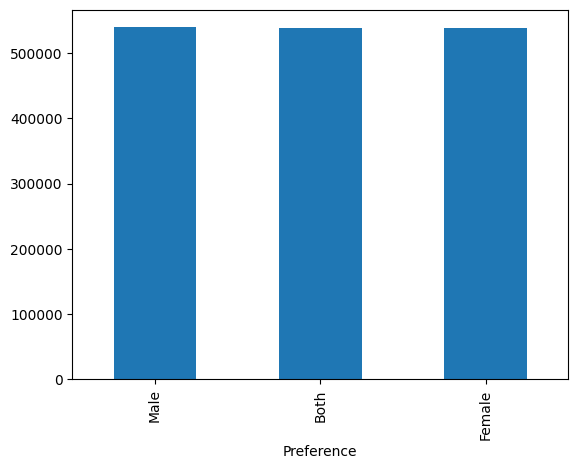

In [ ]:
df.Preference.value_counts().plot(kind='bar');

In [ ]:
# Separate columns by datatype
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


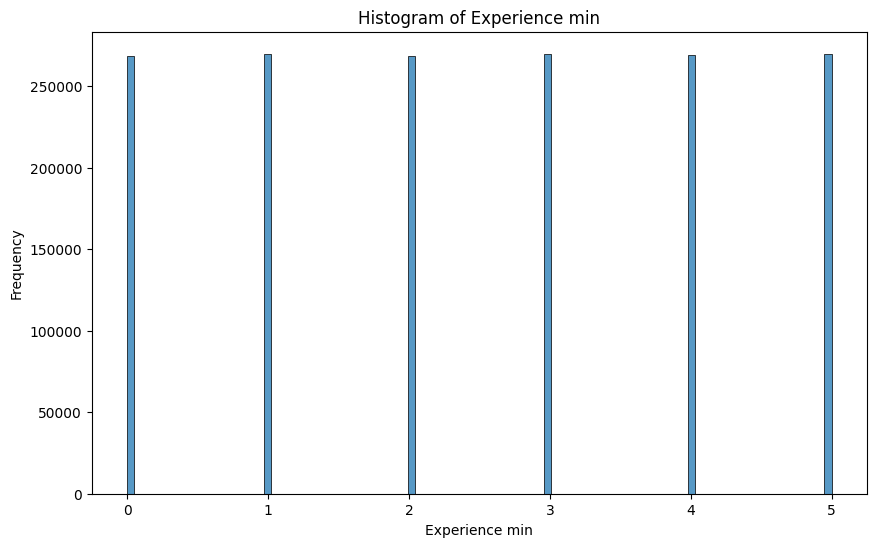

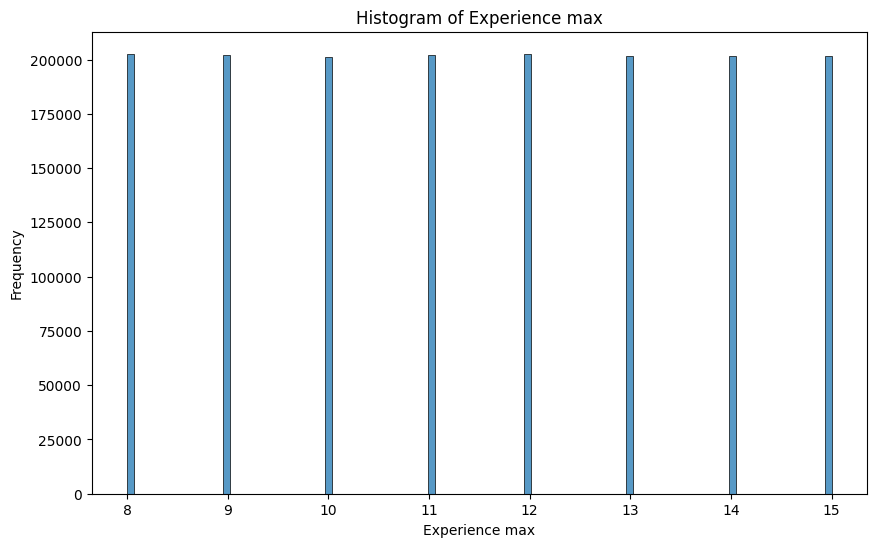

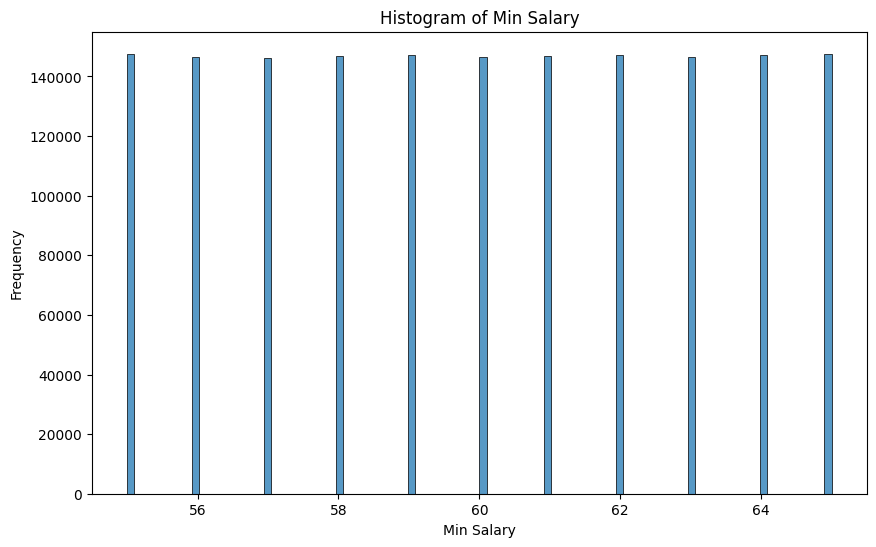

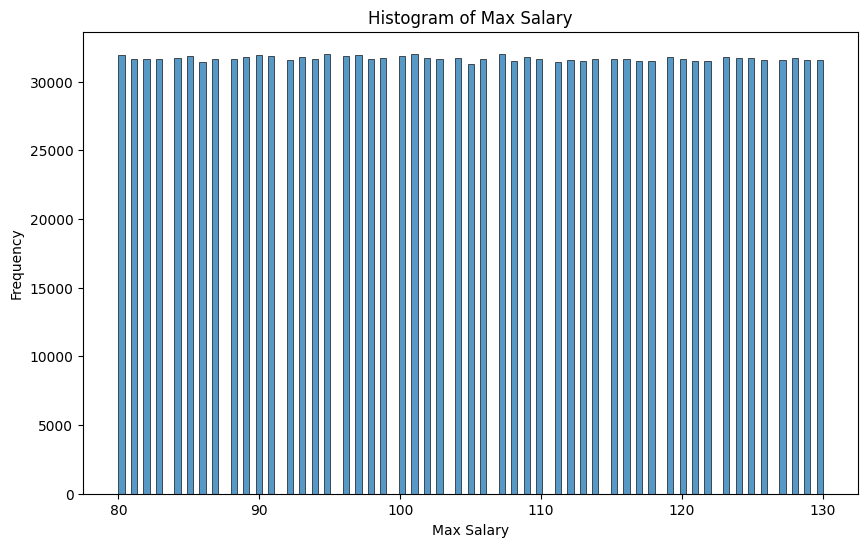

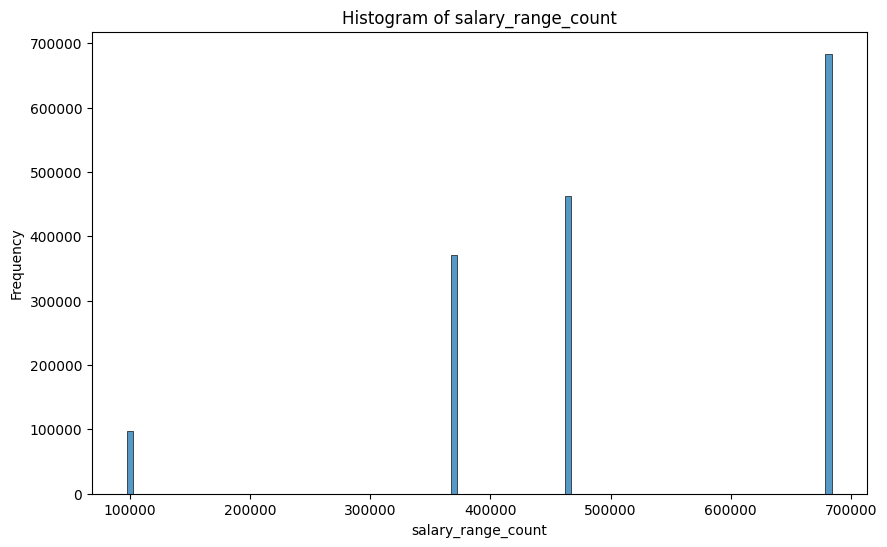

In [ ]:
# Plot histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

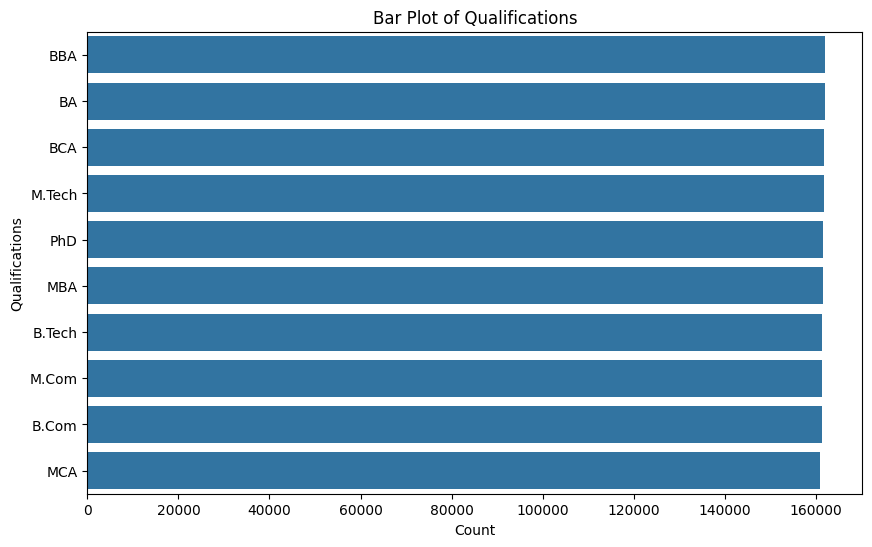

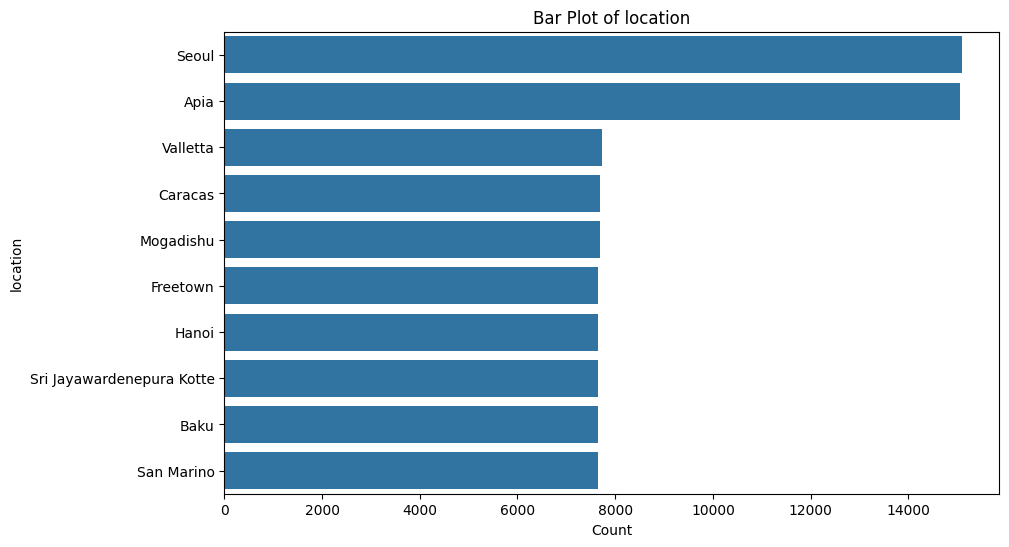

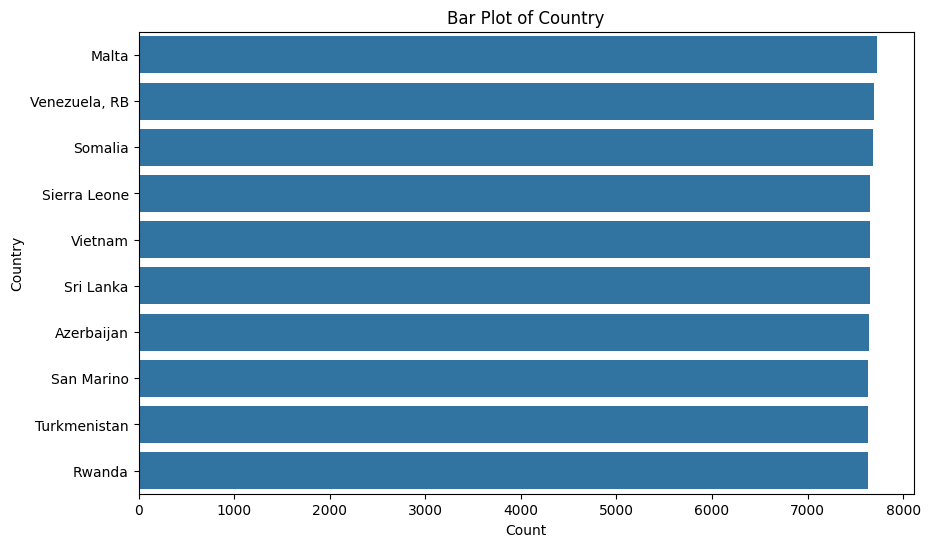

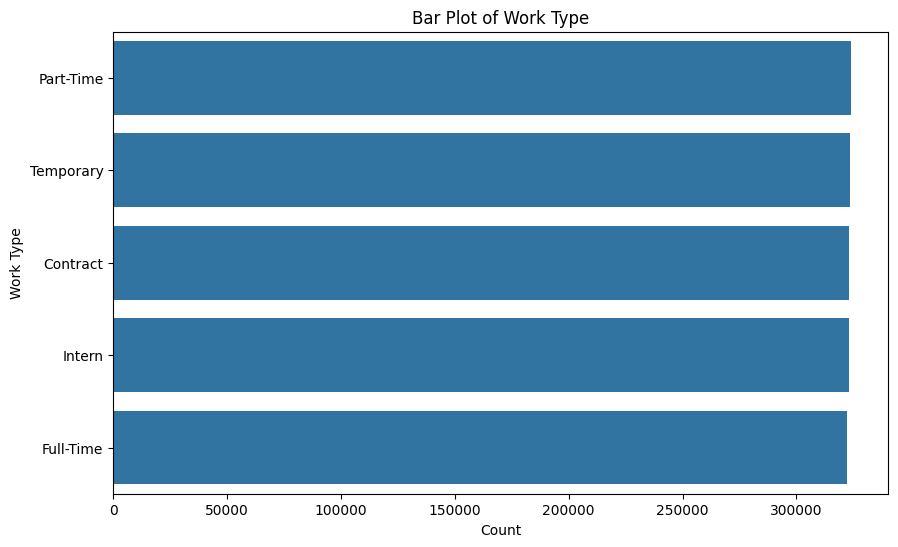

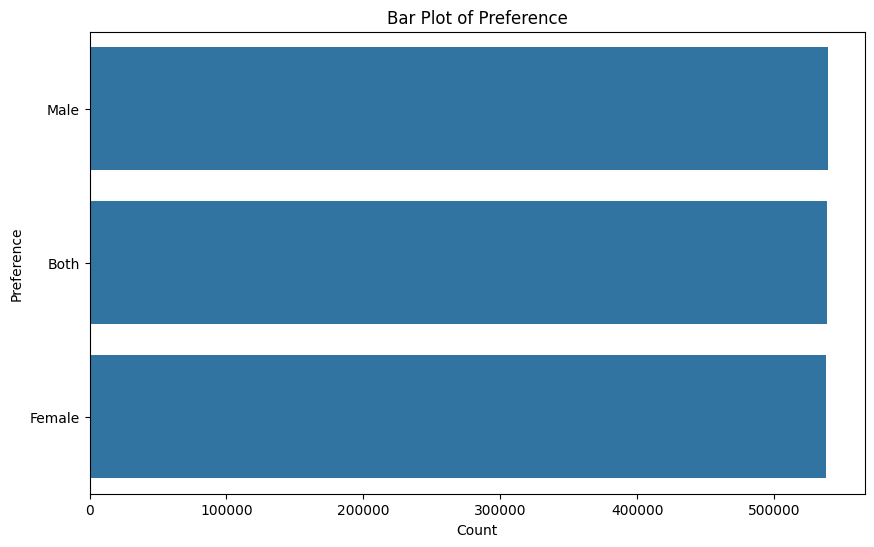

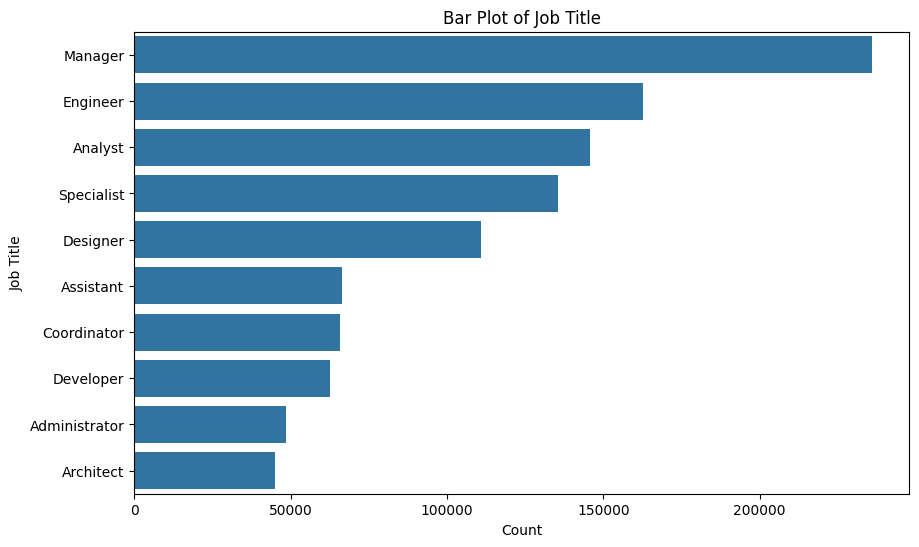

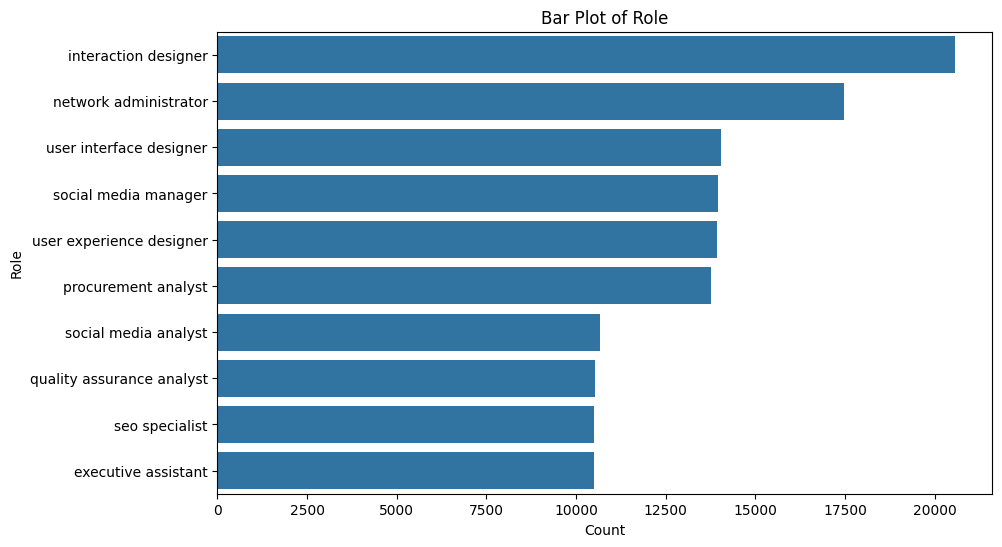

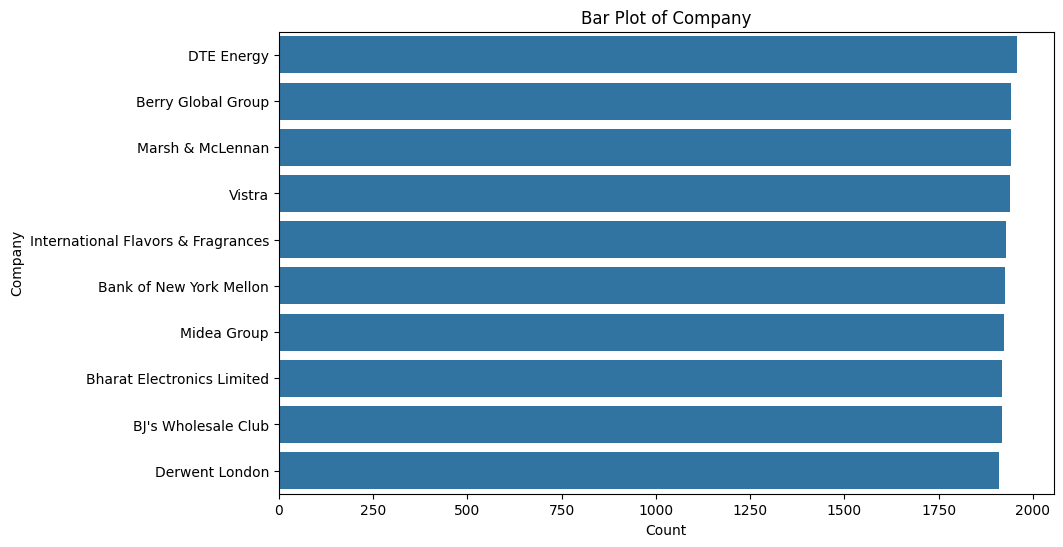

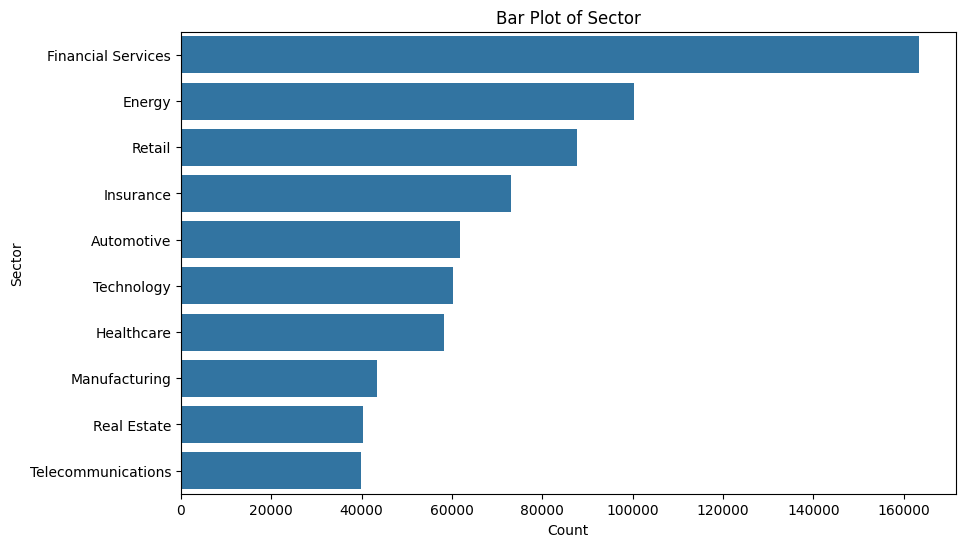

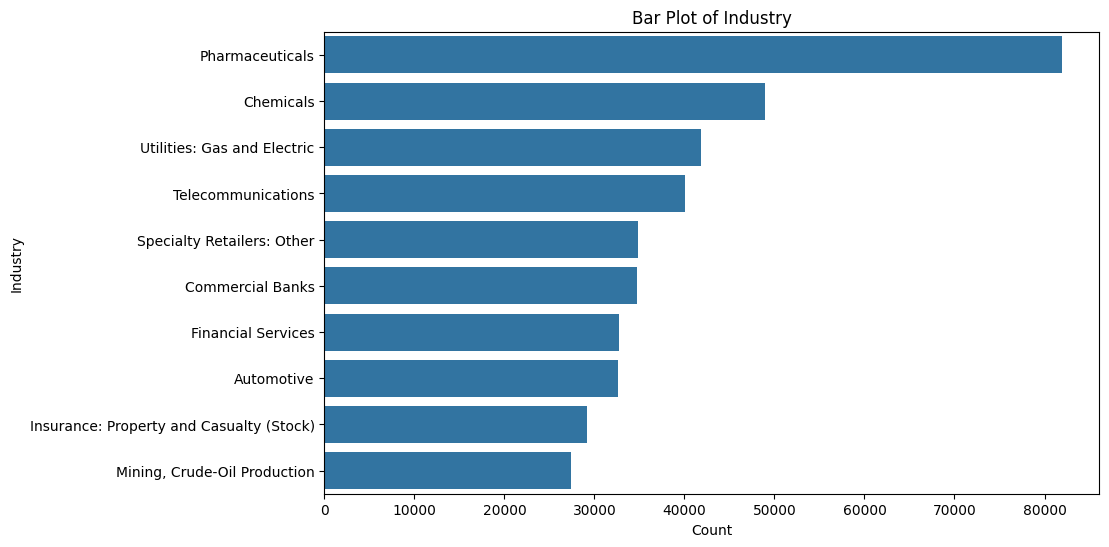

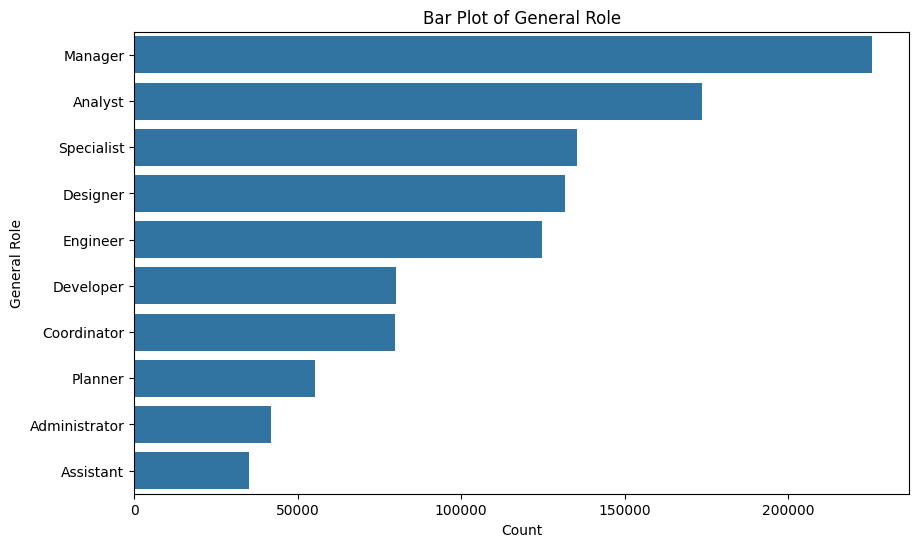

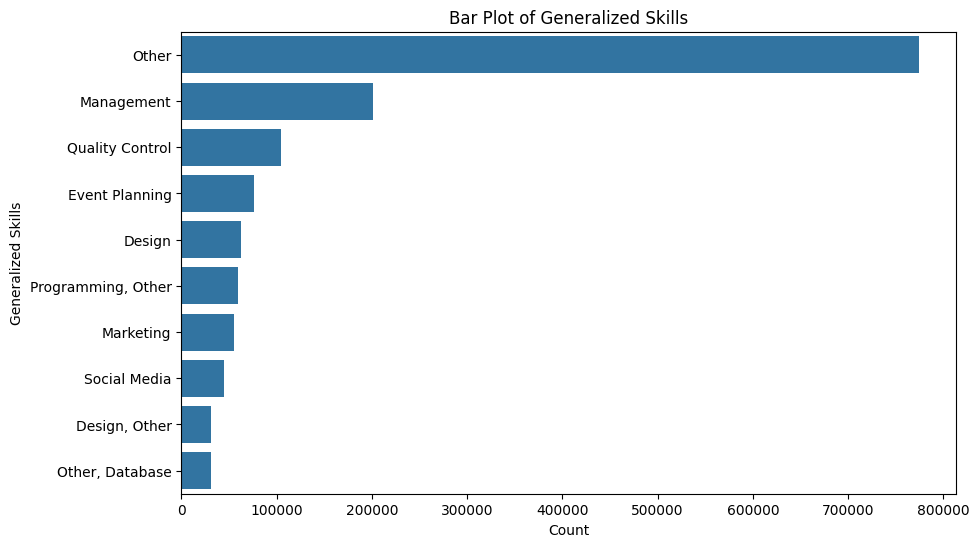

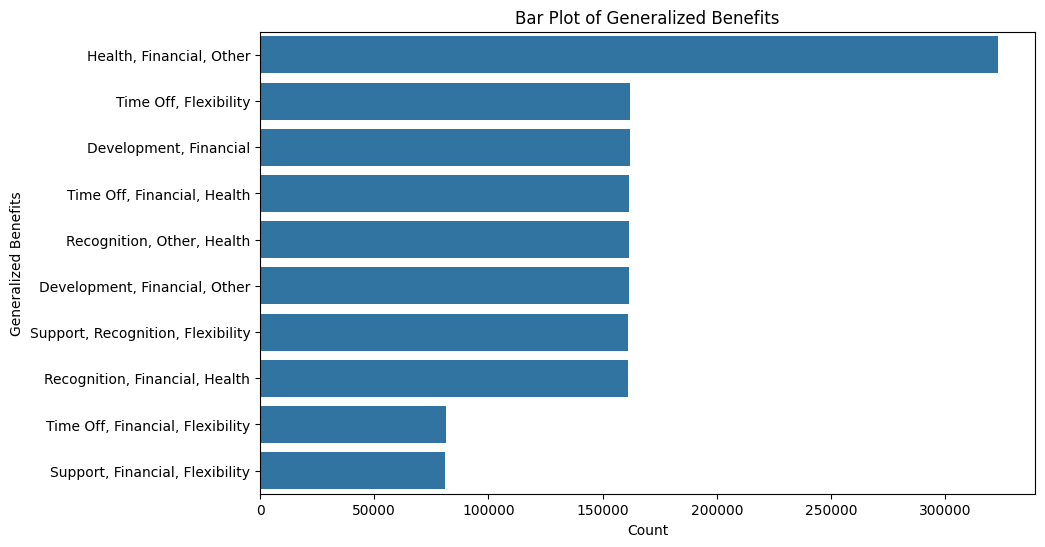

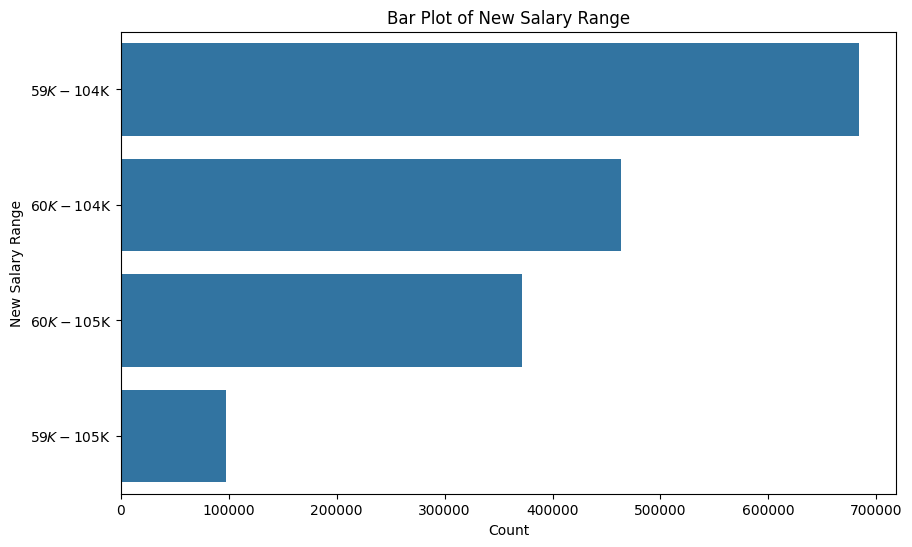

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    top_categories = df[column].value_counts().nlargest(10).index  # Show top 10 categories
    sns.countplot(y=df[column], order=top_categories)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [ ]:
import numpy as np

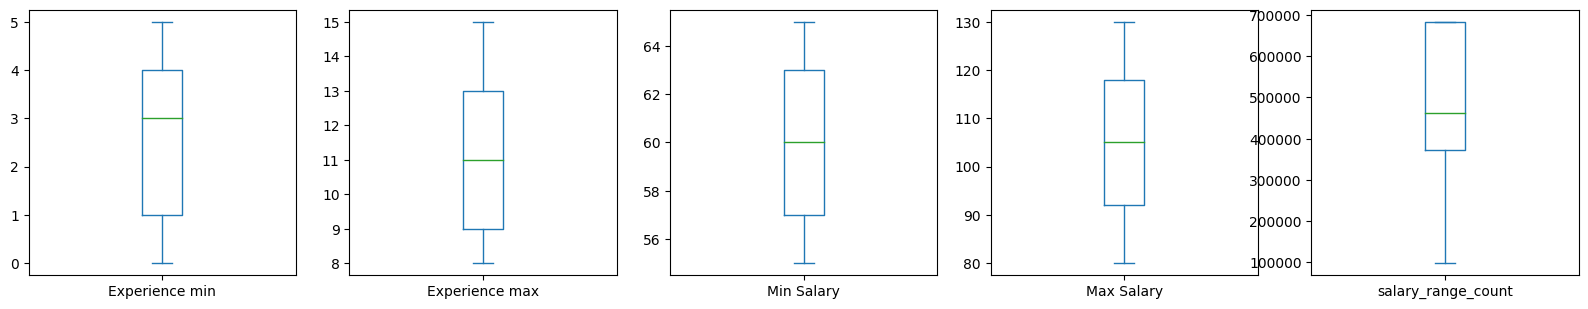

In [ ]:
df.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

In [ ]:
df['salary_range_count'].value_counts()

,count
salary_range_count,
683918,683918
462962,462962
371301,371301
97759,97759


Upon analyzing the salary_range_count, I observed that there are job postings with unusually high counts of salary ranges. It's important to note that these outliers are not indicative of irregularities or errors in the dataset. Rather, they reflect genuine variations in the number of salary ranges associated with specific job postings.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Function to create box plots for categorical columns
def plot_categorical_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(6, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

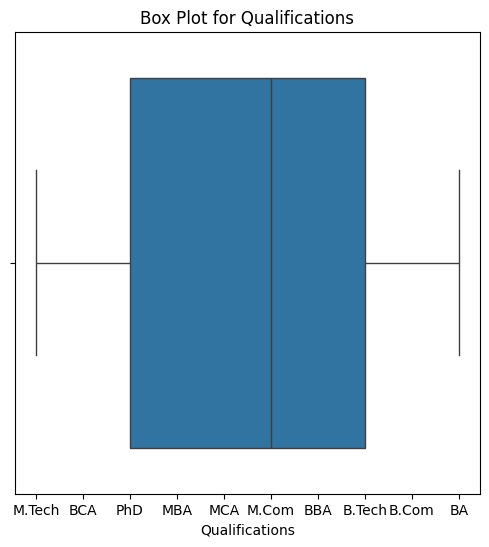

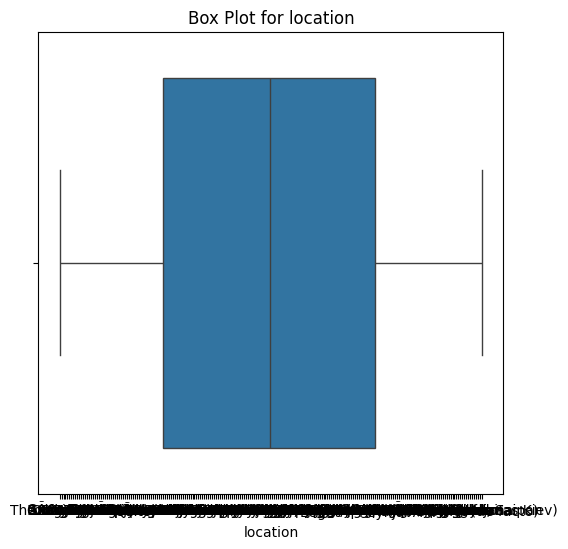

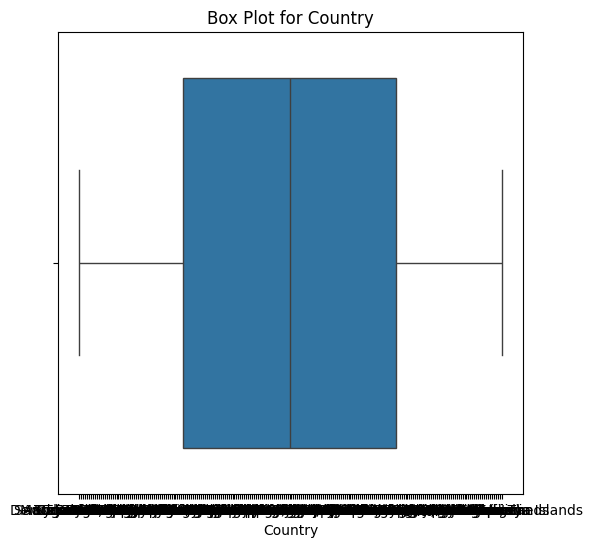

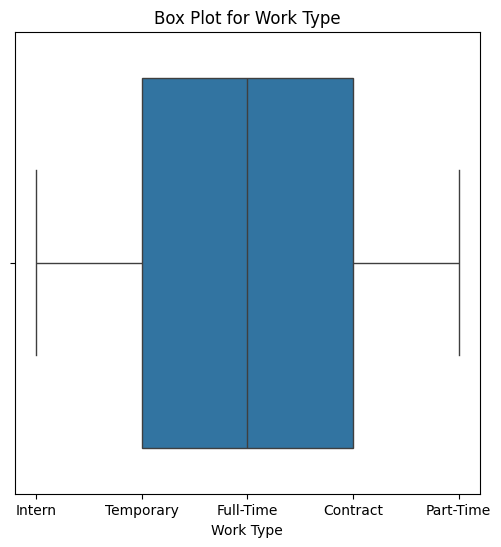

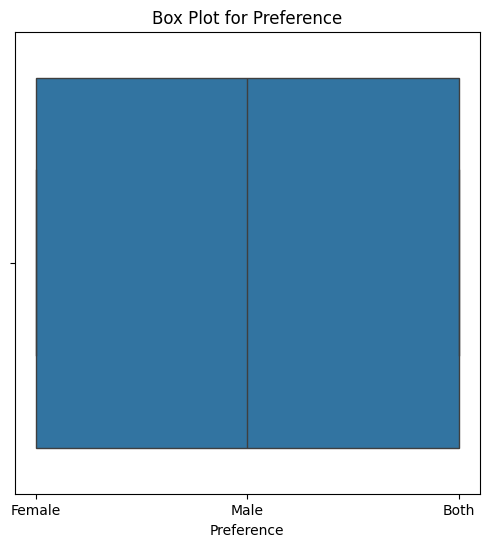

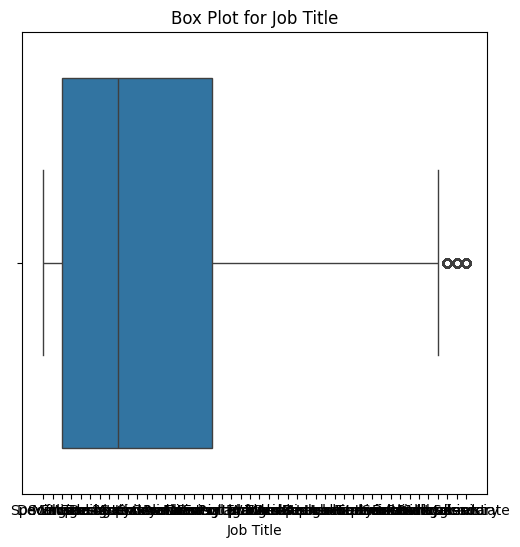

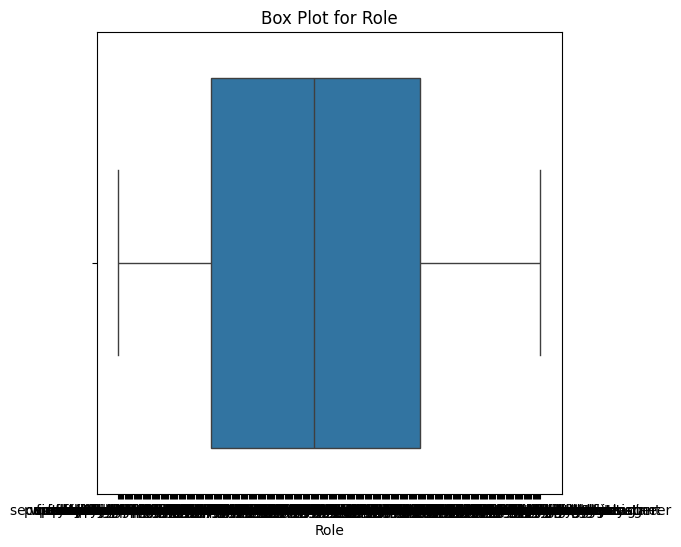

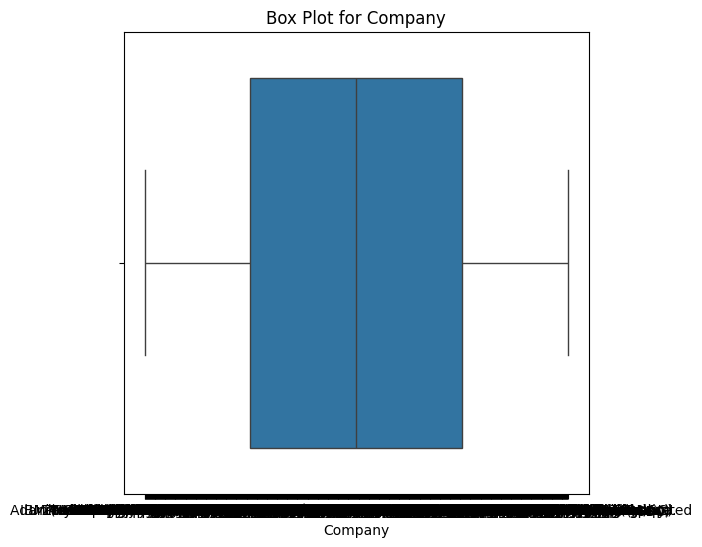

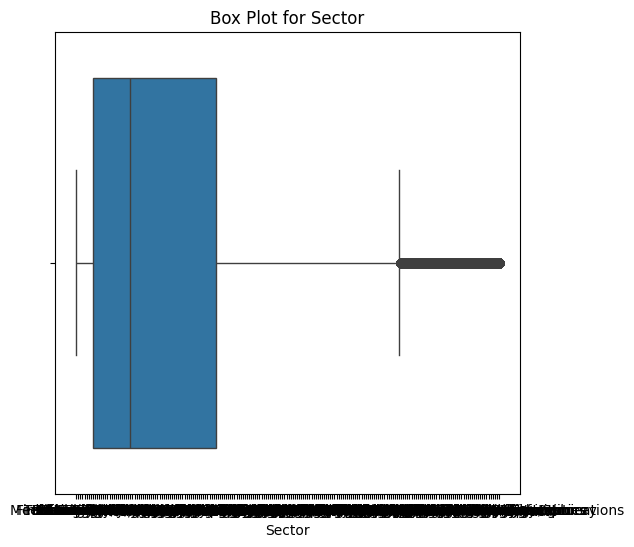

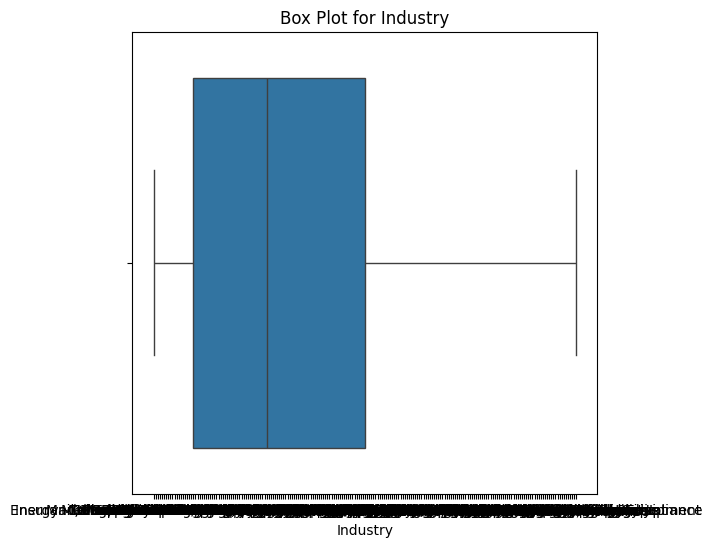

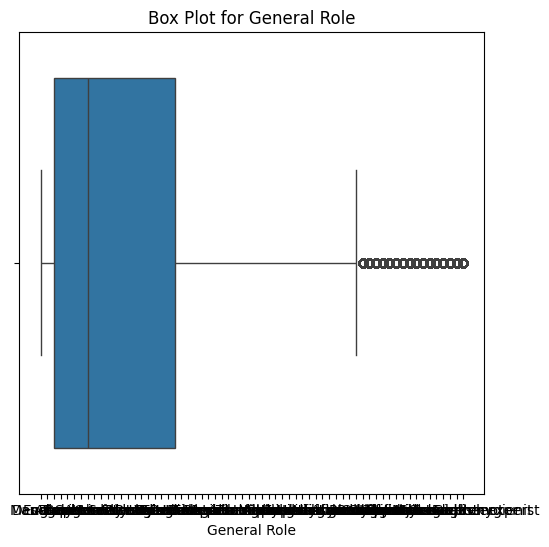

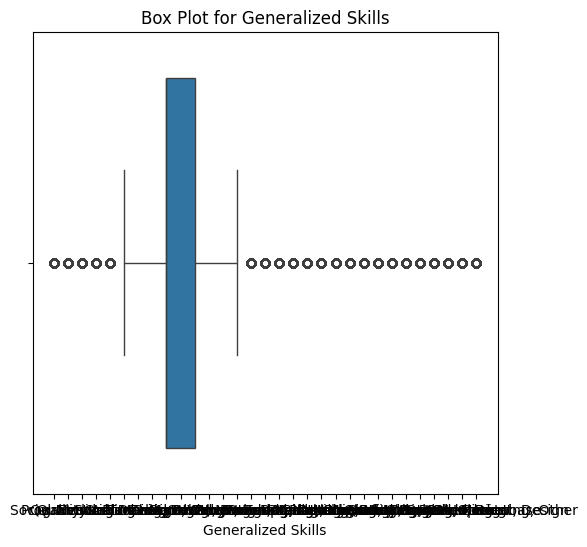

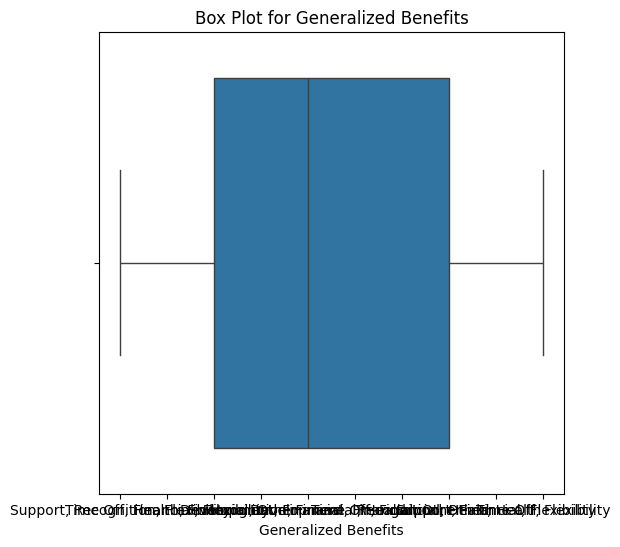

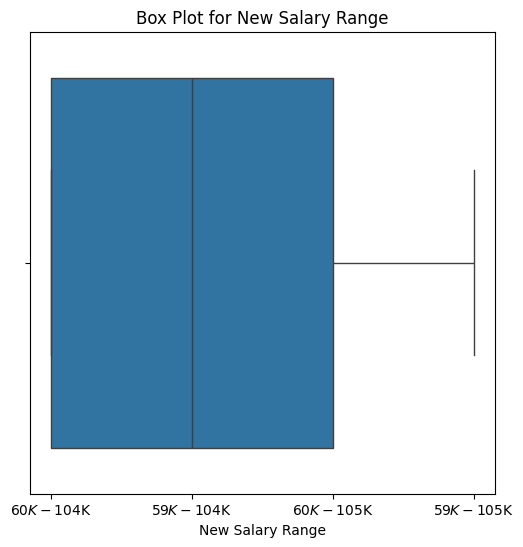

In [ ]:
plot_categorical_boxplots(df, categorical_cols)

In [ ]:
df['Sector'].value_counts()

,count
Sector,
Financial Services,163346
Energy,100367
Retail,87633
Insurance,73135
Automotive,61862
Technology,60336
Healthcare,58331
Manufacturing,43385
Real Estate,40250


In [ ]:
df['General Role'].value_counts()

,count
General Role,
Manager,225744
Analyst,173812
Specialist,135446
Designer,131687
Engineer,124873
Developer,80010
Coordinator,79627
Planner,55347
Administrator,41953


In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
Manager,235995
Engineer,162785
Analyst,145839
Specialist,135642
Designer,110923
Assistant,66413
Coordinator,65673
Developer,62738
Administrator,48618


The outliers in the Sector variable indicate a higher number of job postings in sectors such as Financial Services, Energy, Retail, Insurance, and Automotive. These outliers reflect the prevalence of jobs in these industries and are representative of the dataset's sector distribution.

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                    Experience min  Experience max  Min Salary  Max Salary  \
Experience min            1.000000       -0.000970    0.001025    0.001677   
Experience max           -0.000970        1.000000   -0.000789    0.000304   
Min Salary                0.001025       -0.000789    1.000000    0.000995   
Max Salary                0.001677        0.000304    0.000995    1.000000   
salary_range_count        0.000101       -0.000300   -0.001388   -0.001982   

                    salary_range_count  
Experience min                0.000101  
Experience max               -0.000300  
Min Salary                   -0.001388  
Max Salary                   -0.001982  
salary_range_count            1.000000  


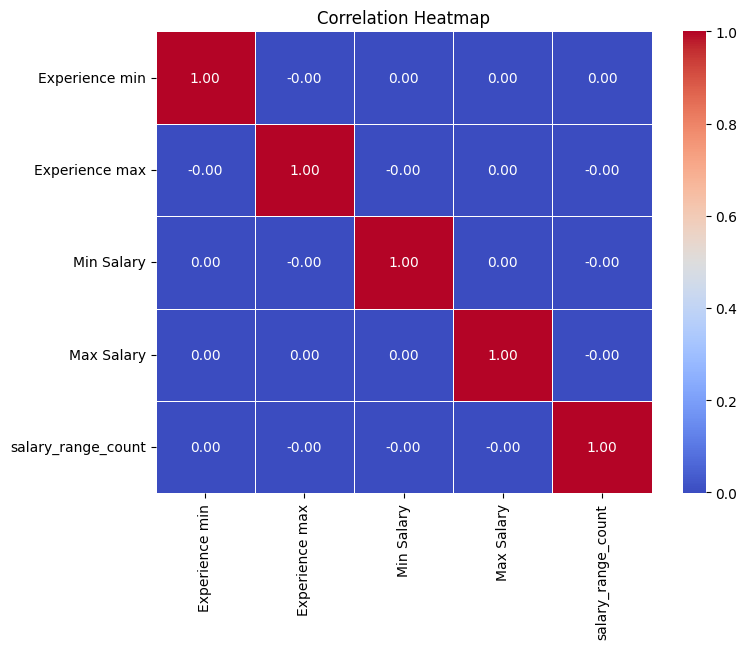

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Check for class imbalance
class_counts = df['New Salary Range'].value_counts()

print("Count of each salary range:")
print(class_counts)

Count of each salary range:
New Salary Range
$59K-$104K    683918
$60K-$104K    462962
$60K-$105K    371301
$59K-$105K     97759
Name: count, dtype: int64


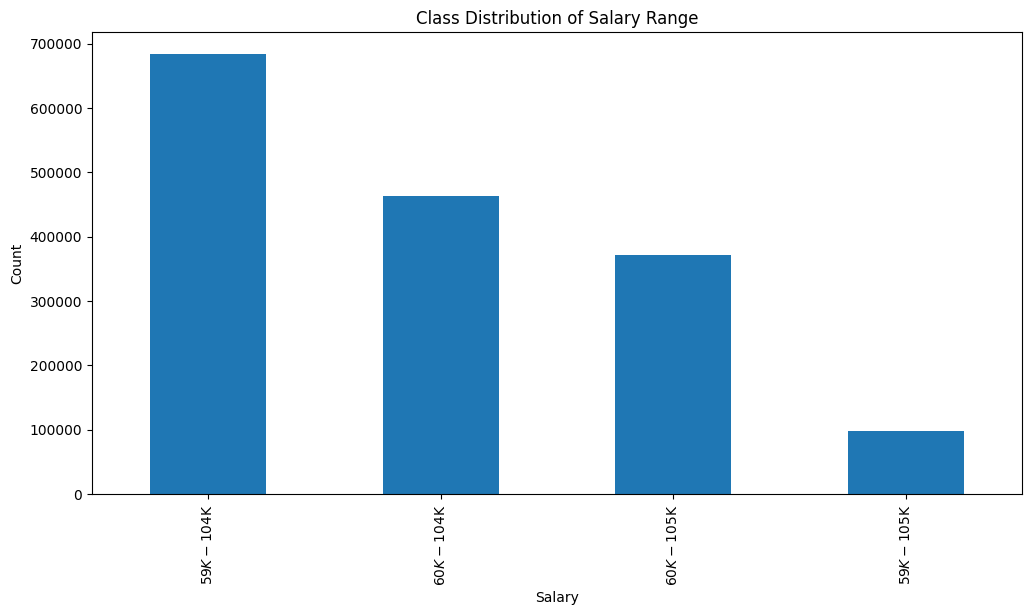

In [ ]:
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution of Salary Range')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression


In [ ]:
predictor = pd.get_dummies(df.drop(columns=['New Salary Range']), drop_first=True)


In [ ]:
target = df['New Salary Range']

In [ ]:
X=predictor
y=target

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train_X, train_y)

NameError: name 'model' is not defined